# 4주차 과제 : Random forest 전처리  (+ 3주차 과제 수정) 


#### 변수 설명


(1) Date 날짜 : object

(2) Rented Bike Count 자전거 대여량 : Numeric

(3) Hour 시간 : Numeric

(4) Temperature(°C) 기온 : Numeric

(5) Humidity(%) 습도 : Numeric

(6) Wind speed((m/s) 풍량 : Numeric

(7) Dew point temperature(°C) 이슬점 : Numeric

(8) Visibility(10m) 시야거리 : Numeric

(9) Solar Radiation(MJ/m2) 태양복사 : Numeric

(10) Rainfall(mm) 강우량 : Numeric

(11) Snowfall(cm) 적설량 : Numeric

(12) Seasons 계절 : Spring, Summer, Autumn, Winter

(13) Holiday 휴일 유무 : Holiday or No Holiday

(14) Funtional day : Yes or No


* 시간 : Hour
* 날씨 관련 : Temperature,Humidity,Wind speed,Dew point temperature,Visibility,Rainfall,Snowfall
* 계절별 : Seasons (이것도 날씨랑 관련있긴 함).Date 
* 휴무 유무 : Holiday, Funtional day

## 라이브러리 설치 및 환경 설정

In [1]:
#기본 라이브러리 설치
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션

#!pip install missingno
import missingno as msno #결측치 유무 확인 라이브러리

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#working directory 확인
os.getcwd() #현재 작업 위치 출력

'/Users/kimminji'

## 데이터 불러오기

In [3]:
bike = pd.read_csv('/Users/kimminji/Downloads/SeoulBikeData_NaN.csv')
df=bike.copy()
df

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## EDA
    - 변수 구조 확인
    - 중복값 여부 확인
    - 결측치 여부 확인
    - 이상치 여부 확인
    - 상관관계 확인
    - 범주형 & 수치형 변수 분석
    - 변수들간 관계 확인

### 변수 구조 확인

In [4]:
# 전체적인 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(°C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(°C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

In [5]:
# 데이터 차원 확인
df.shape

(8760, 15)

In [6]:
# 수치형 변수들의 기술통계량 확인
df.describe()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,7884.000000,8760.000000,7884.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,704.602055,11.500000,13.026370,58.226256,1.727220,1436.825799,4.073813,0.569111,0.148687,0.075068
std,2528.938512,644.997468,6.922582,11.936017,20.362413,1.036138,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2189.750000,191.000000,5.750000,3.600000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,4379.500000,504.500000,11.500000,13.950000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,6569.250000,1065.250000,17.250000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,8759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# 변수 이름 변경(단위 생략) & 불필요한 열 (Unnamed;0) 제거
df.rename(columns={'Temperature(°C)': 'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed'
                   ,'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew point temperature','Solar Radiation (MJ/m2)':'Solar Radiation'
                  ,'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'}, inplace=True)

df = df.drop('Unnamed: 0',axis = 1)
#df = df.loc[:, ~df.columns.str.contains('^Unnamed: 0')]

### 중복값 여부 확인

-> 중복값 없음

In [8]:
#중복된 값을 가진 행 출력
df[df.duplicated(keep=False)] #keep=False: 모든 중복행을 표시

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


### 결측치 여부 확인
-> Temperature, Wind speed, Seasons 총 3개의 변수에서 결측치 발생함.

In [9]:
# 변수별 결측치 갯수 확인
df.isna().sum().sort_values()

Date                       0
Rented Bike Count          0
Hour                       0
Humidity                   0
Visibility                 0
Dew point temperature      0
Solar Radiation            0
Rainfall                   0
Snowfall                   0
Holiday                    0
Functioning Day            0
Temperature              876
Wind speed               876
Seasons                  876
dtype: int64

<AxesSubplot:>

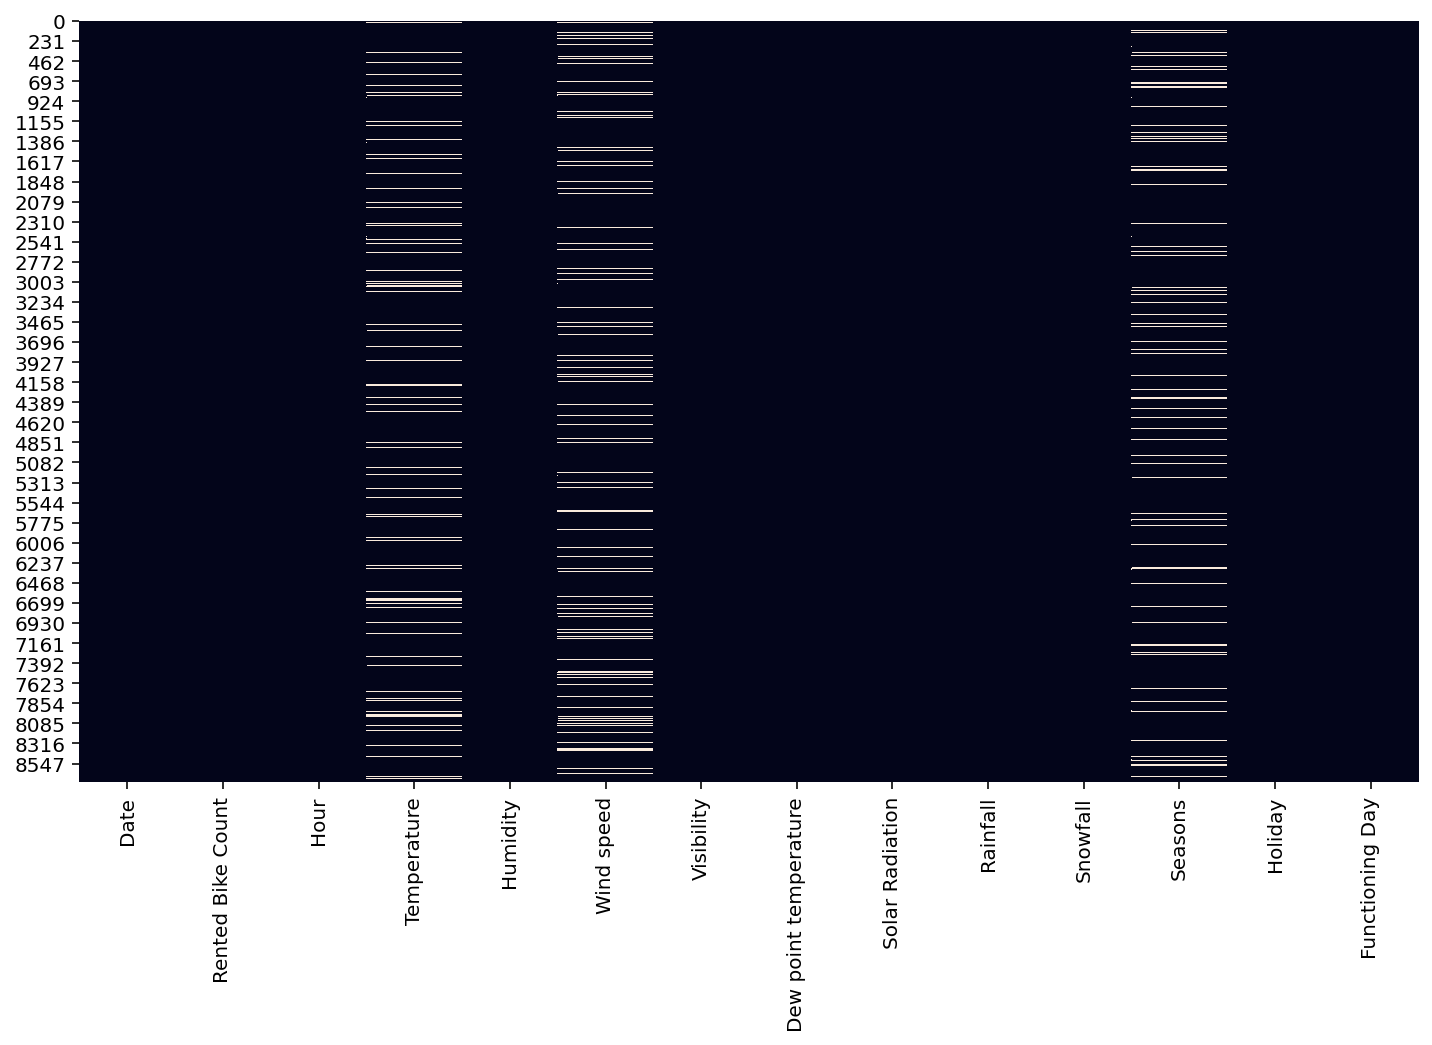

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar = False)

### 이상치 여부 확인

수치형 변수들에 한해서 이상치 파악

-> Box Plot에 의하면 이상치는 존재하는 듯 보임.(추후 확인 필요)

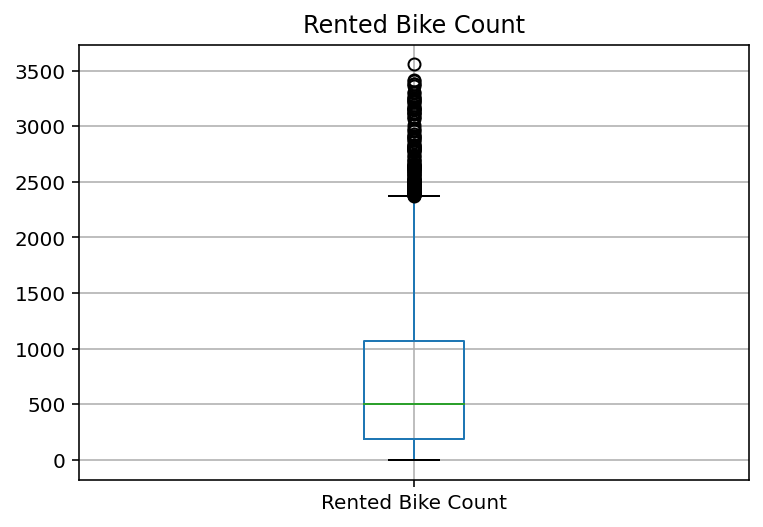

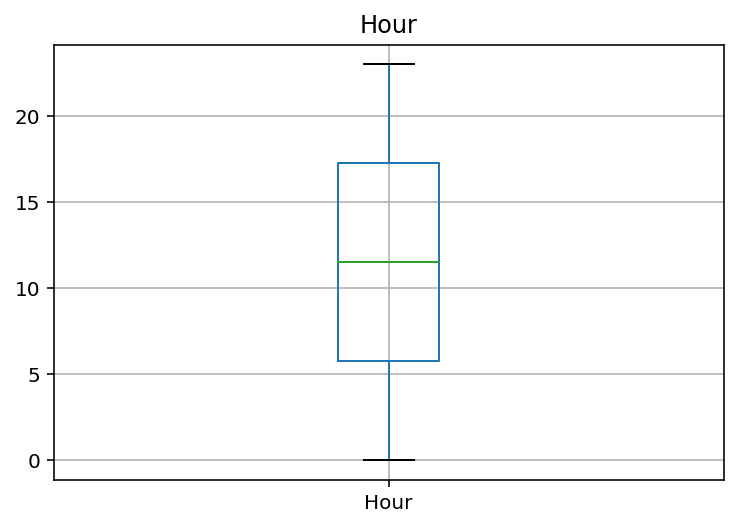

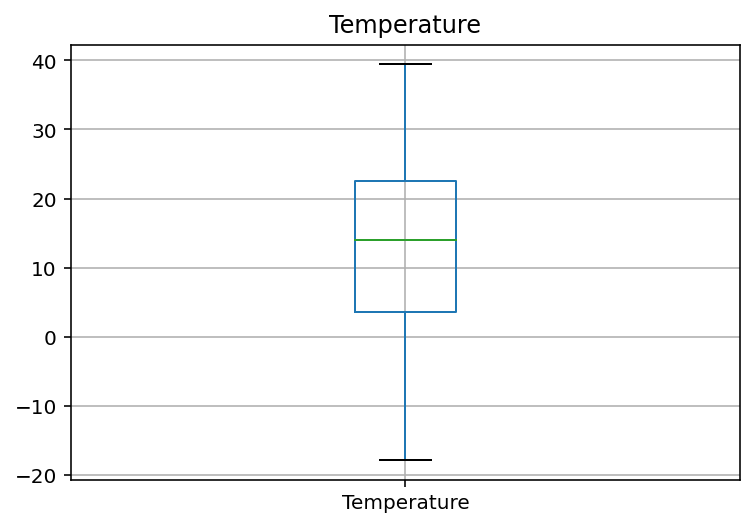

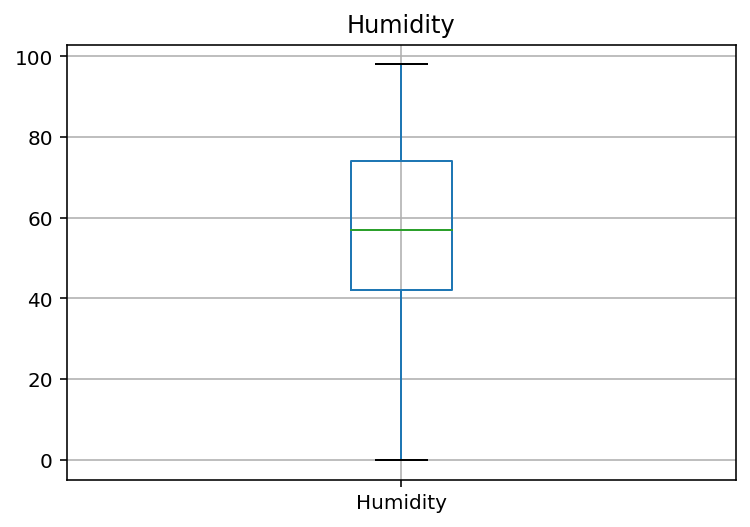

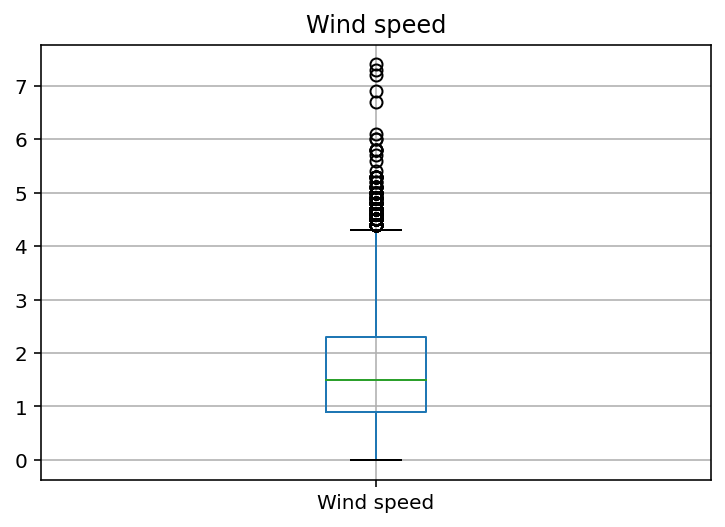

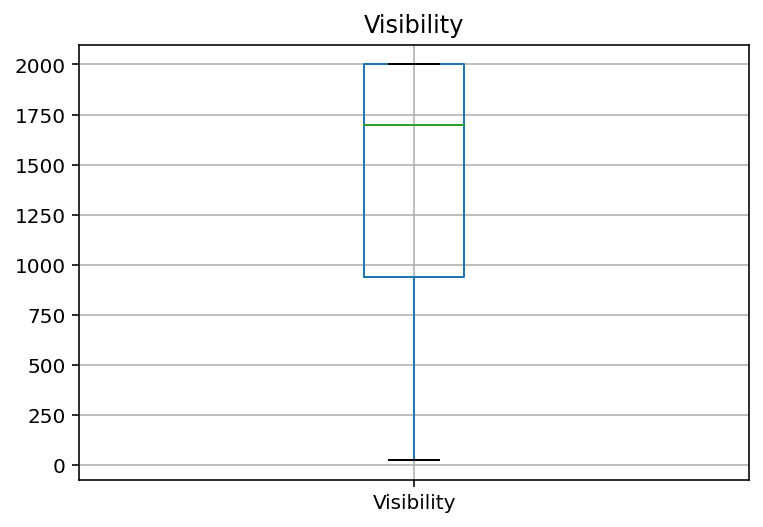

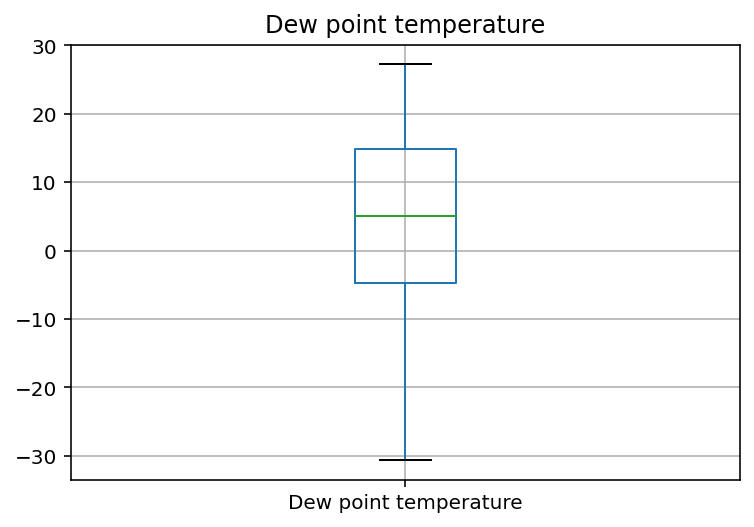

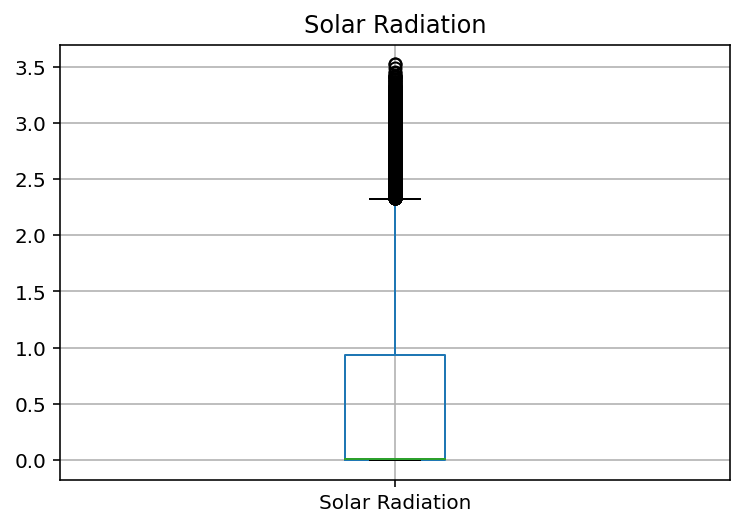

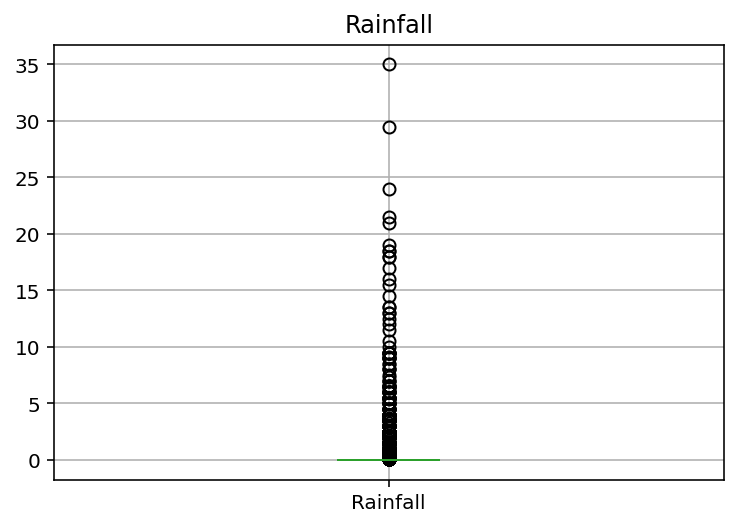

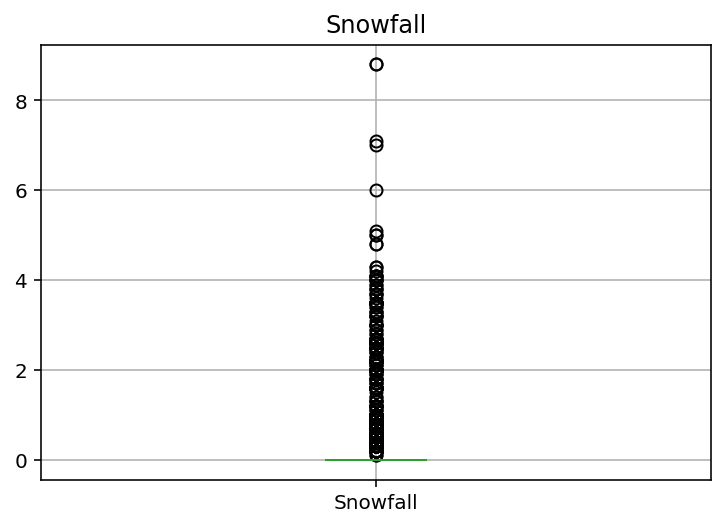

In [11]:
# Box plot그리기
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # 수치형 변수만 선택
        df.boxplot(column=column)
        plt.title(column)  # 변수 이름을 그래프 제목으로 설정
        plt.show()  # 각 변수에 대한 박스플롯

### 상관관계 확인

수치형 변수들에 한해서 상관관계 확인

:상관계수 분석을 수행할 때 종속 변수는 분석 대상에서 제외하는 것이 일반적으로 권장됩니다.

    -> Temperature / Dew point temperature 강한 상관관계
    -> Humidity / Dew point temperature 약한 상관관계
    -> Visibility  / Humidity 약한 상관관계
    -> Solar Radiation / Humidity  약한 상관관계

In [12]:
#변수간 상관계수 계산
cor = df[["Hour", "Temperature", "Humidity", "Wind speed","Visibility"
            ,"Dew point temperature","Solar Radiation","Rainfall","Snowfall"]].corr()
cor

,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Hour,1.000000,0.116151,-0.241644,0.284573,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.116151,1.000000,0.156094,-0.034464,0.039581,0.912099,0.356539,0.050215,-0.221321
Humidity,-0.241644,0.156094,1.000000,-0.336105,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.284573,-0.034464,-0.336105,1.000000,0.170671,-0.178011,0.331239,-0.019080,-0.001319
Visibility,0.098753,0.039581,-0.543090,0.170671,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.003054,0.912099,0.536894,-0.178011,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.145131,0.356539,-0.461919,0.331239,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,0.008715,0.050215,0.236397,-0.019080,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.021516,-0.221321,0.108183,-0.001319,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<AxesSubplot:>

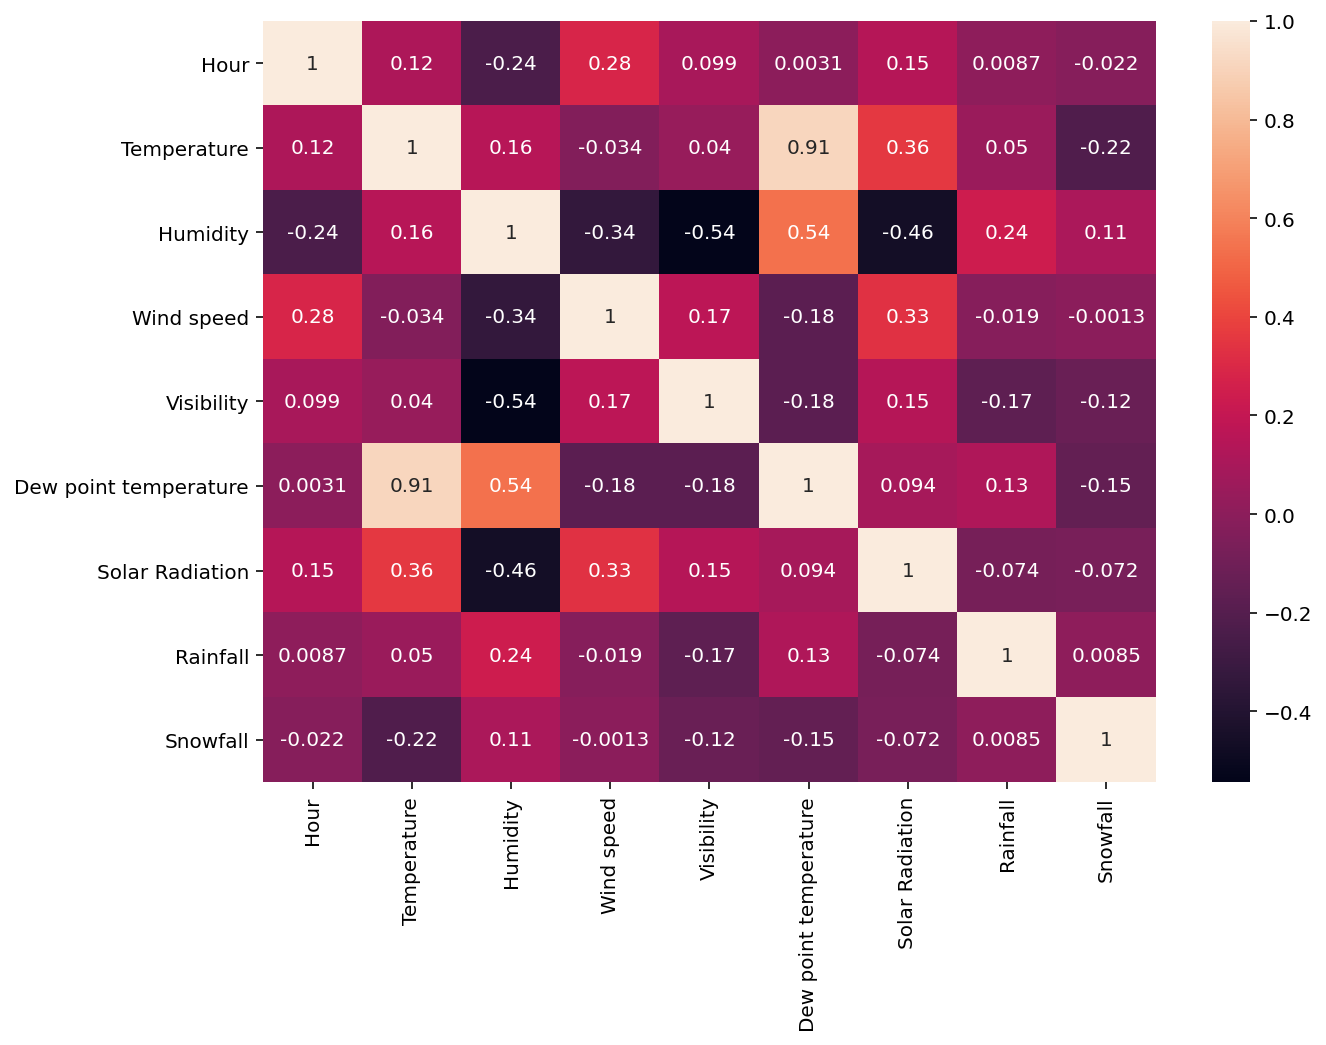

In [13]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cor,annot = True)

In [14]:
# 데이터프레임에서 변수 간의 상관관계 계산
correlation_matrix = cor

# 상관관계 행렬을 대각선을 기준으로 반만 가져와 상관관계가 큰 순서대로 정렬
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)

# 대각선을 중심으로 반만 가져왔으므로 중복된 상관계수는 제외
correlation_values = correlation_values[correlation_values != 1.0]

# 결과 출력
print(correlation_values)

Temperature            Dew point temperature    0.912099
Dew point temperature  Temperature              0.912099
                       Humidity                 0.536894
Humidity               Dew point temperature    0.536894
Temperature            Solar Radiation          0.356539
                                                  ...   
Humidity               Wind speed              -0.336105
Solar Radiation        Humidity                -0.461919
Humidity               Solar Radiation         -0.461919
Visibility             Humidity                -0.543090
Humidity               Visibility              -0.543090
Length: 72, dtype: float64


<AxesSubplot:>

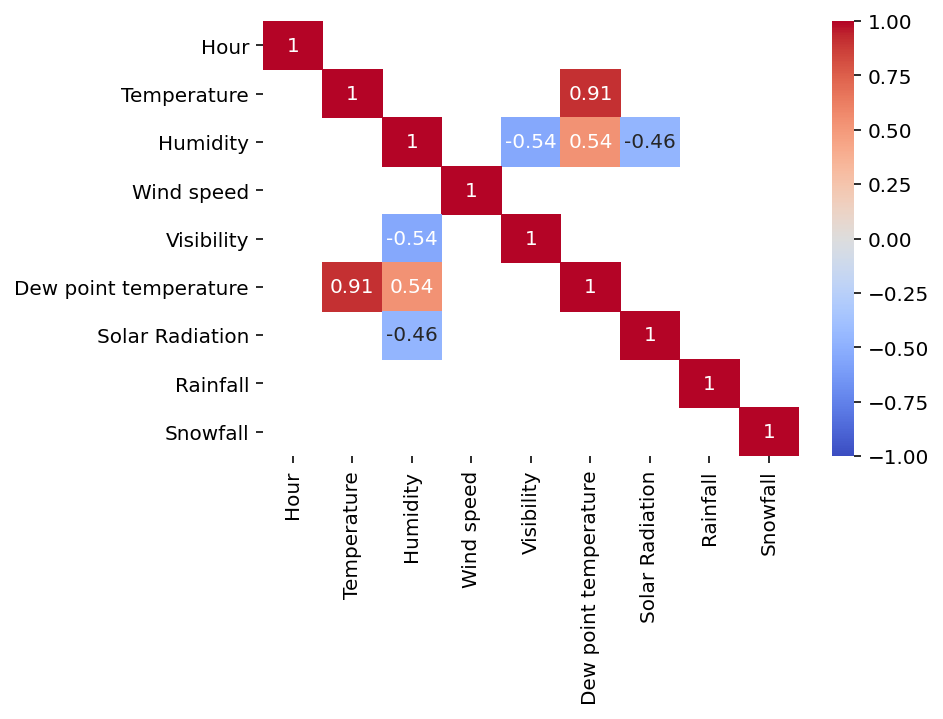

In [15]:
#HeatMap에서 상관계수의 절댓값이 0.4이상인 것만 표시
sns.heatmap(cor[abs(cor) >= 0.4], cmap="coolwarm", annot=True, vmin=-1,vmax=1)

### 범주형 변수

Holiday / Functioning day / Seasons

#### Holiday / Functioning day

Holiday = 공휴일(크리스마스,설,근로자의 날 등)

-> 공휴일에는 평소보다 자전거 대여량이 작다

Functioning day = 운영을 안 하는 날?

-> Functioning day가 아닐 때는 대여량 0 

In [16]:
print(df['Holiday'].value_counts())
print(df['Functioning Day'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [17]:
holiday_rows = df[df['Holiday'] == 'Holiday']
holiday_rows['Date'].drop_duplicates()

504     22/12/2017
552     24/12/2017
576     25/12/2017
720     31/12/2017
744     01/01/2018
1824    15/02/2018
1848    16/02/2018
1872    17/02/2018
2160    01/03/2018
3624    01/05/2018
4128    22/05/2018
4488    06/06/2018
6168    15/08/2018
7104    23/09/2018
7128    24/09/2018
7152    25/09/2018
7344    03/10/2018
7488    09/10/2018
Name: Date, dtype: object

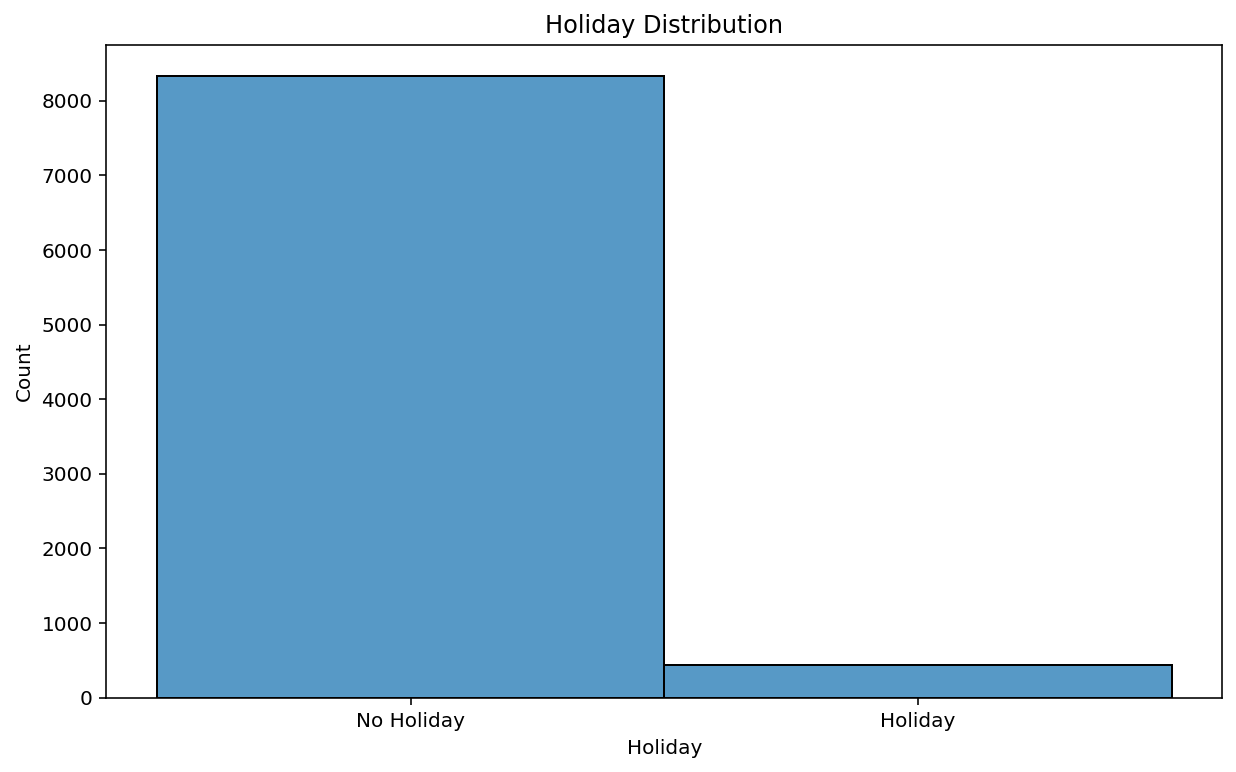

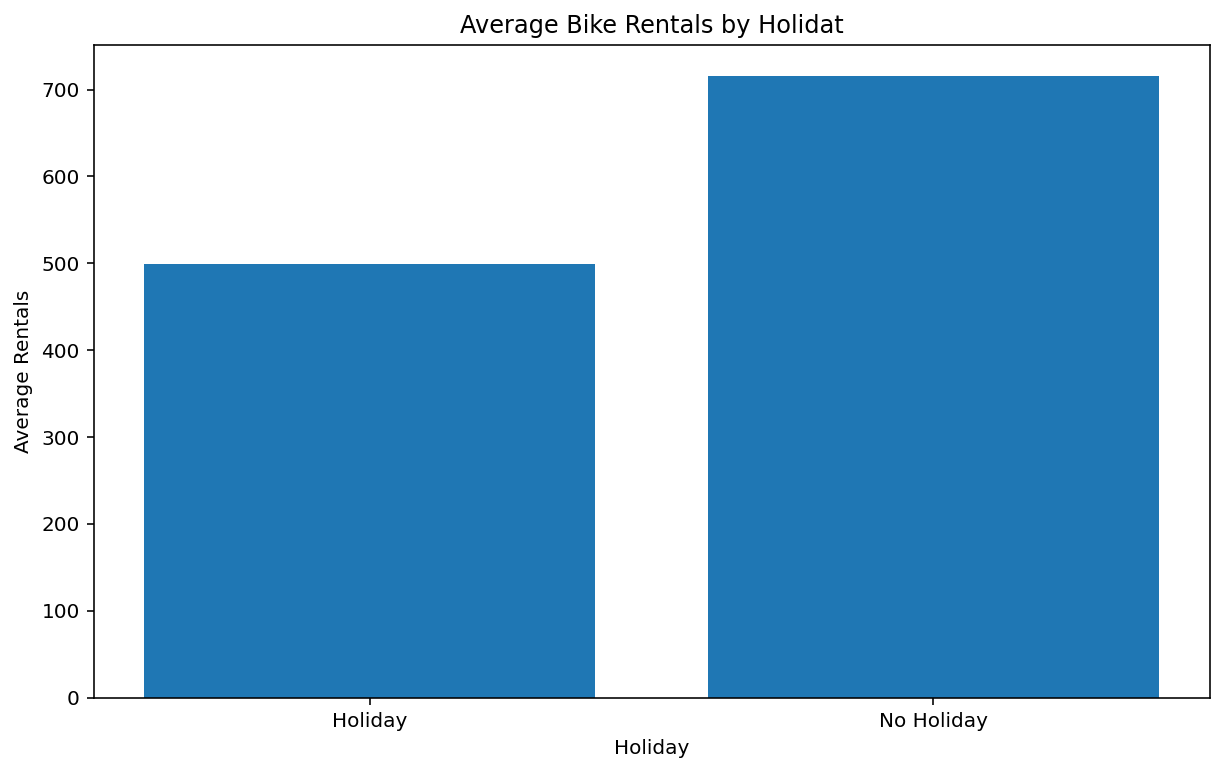

In [18]:
# Holiday의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Holiday'])
plt.title('Holiday Distribution')

# 'Holiday'별로 바이크 대여량의 평균 계산

hol_rentals_mean = df.groupby('Holiday')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hol_rentals_mean.index, hol_rentals_mean.values)
plt.title('Average Bike Rentals by Holidat')
plt.xlabel('Holiday')
plt.ylabel('Average Rentals')
plt.show()

Text(0.5, 1.0, 'Functioning Day Distribution')

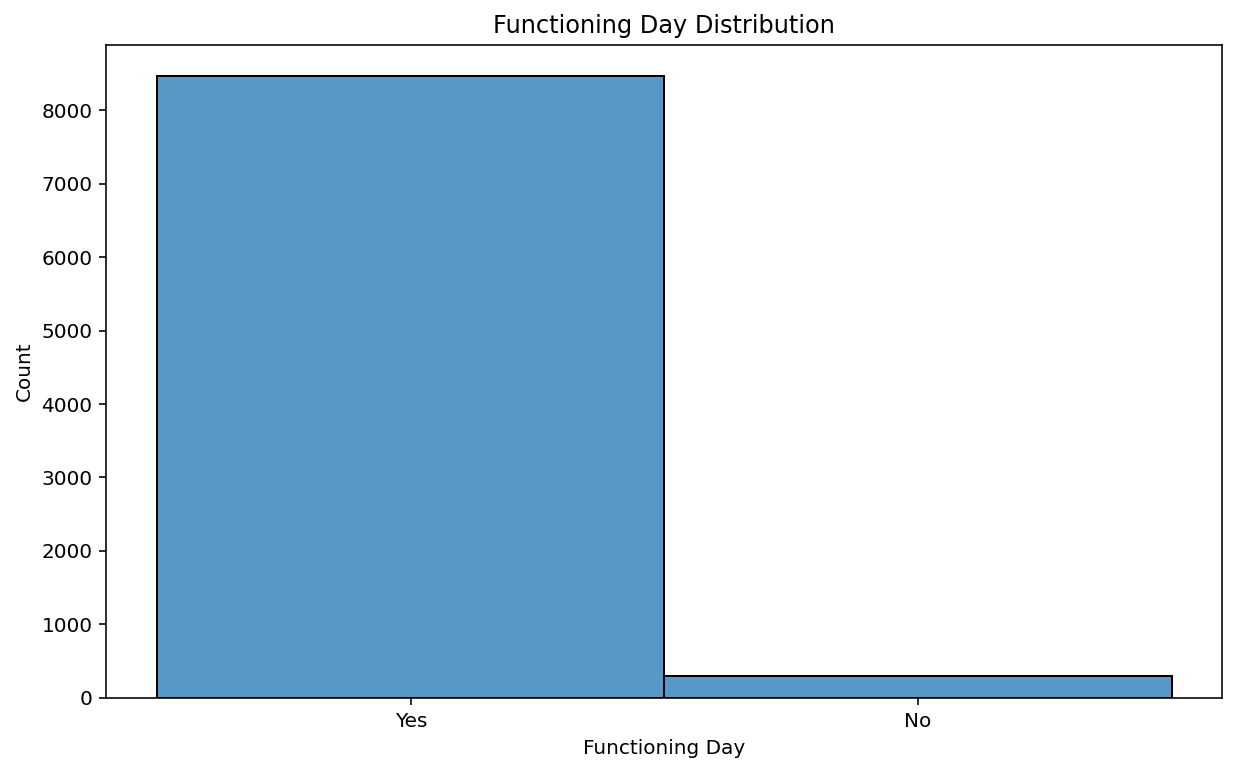

In [19]:
# Functioning Day의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Functioning Day'])
plt.title('Functioning Day Distribution')

In [20]:
function_rows = df[df['Functioning Day'] == 'No']
function_rows['Date'].drop_duplicates()
#이 날들이 다 무슨 날일까?

3144    11/04/2018
3840    10/05/2018
6984    18/09/2018
7008    19/09/2018
7224    28/09/2018
7272    30/09/2018
7320    02/10/2018
7368    04/10/2018
7416    06/10/2018
7488    09/10/2018
8088    03/11/2018
8160    06/11/2018
8232    09/11/2018
Name: Date, dtype: object

#### Seasons
계절

    -> 여름 > 가을 > 봄 > 겨울 순으로 대여량이 많다.
    -> 계절이 자전거 대여량에 영향을 준다.

In [21]:
df['Seasons'].value_counts()

Spring    1990
Summer    1990
Autumn    1969
Winter    1935
Name: Seasons, dtype: int64

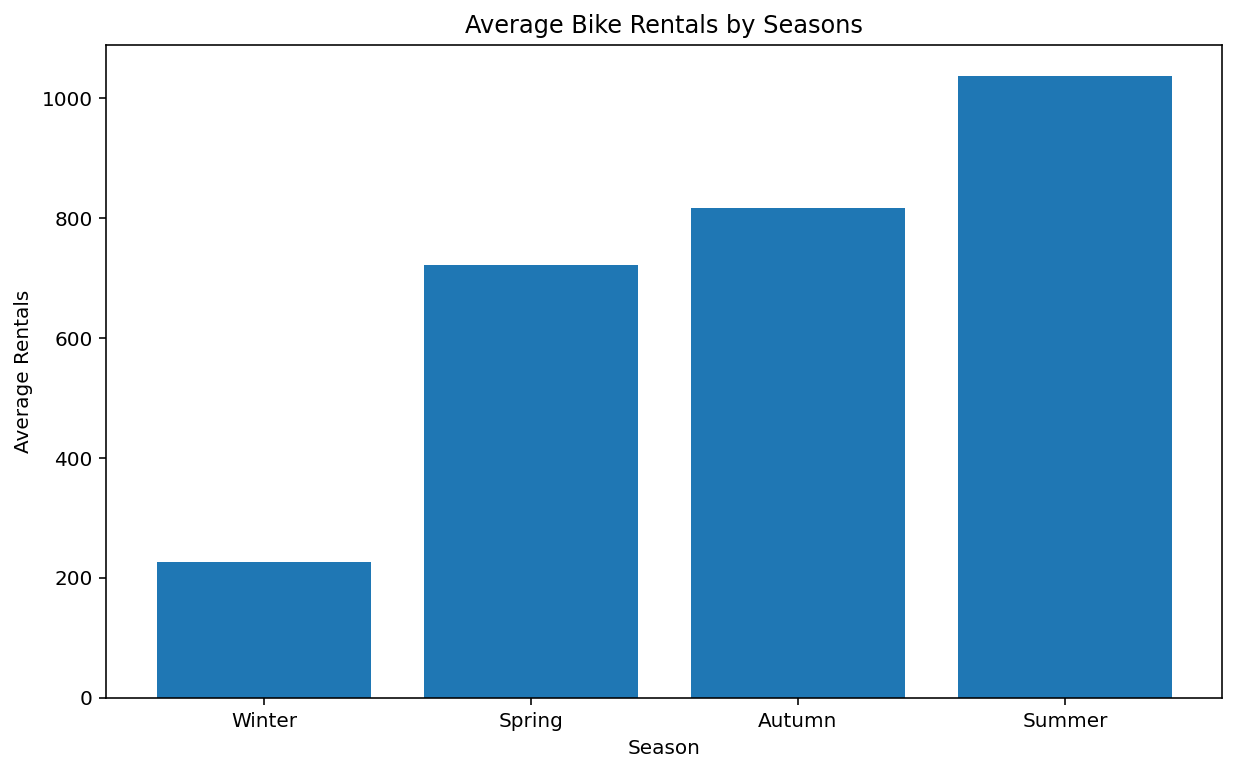

In [22]:
# 'Seasons'별로 바이크 대여량의 평균 계산

sea_rentals_mean = df.groupby('Seasons')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sea_rentals_mean.index, sea_rentals_mean.values)
plt.title('Average Bike Rentals by Seasons')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

### 수치형 변수

distribution : 단순한 데이터의 개수 -> 수집된 데이터의 양 확인 가능

#### 종속변수 Rented Bike Count

In [23]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

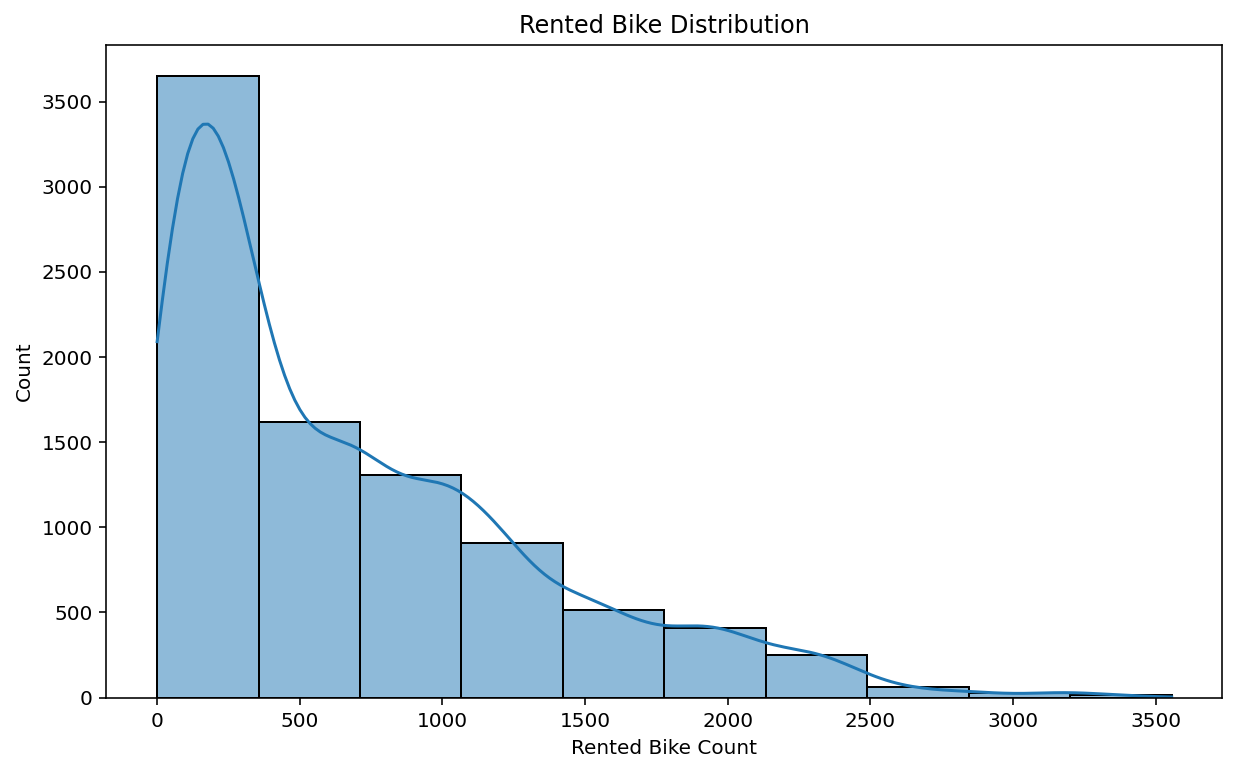

In [24]:
# Rented Bike Count의 분포 
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=10, kde=True) 
plt.title('Rented Bike Distribution',fontsize=12)
plt.show()

#### Hour
: 자건거 빌린 시간

18시 ~ 21시 / 8시 자전거 대여량 많음 

-> 퇴근 시간 이후 그리고 출근시간 유동인구가 많은 시간대

In [25]:
df['Hour'].describe() #0부터 23

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

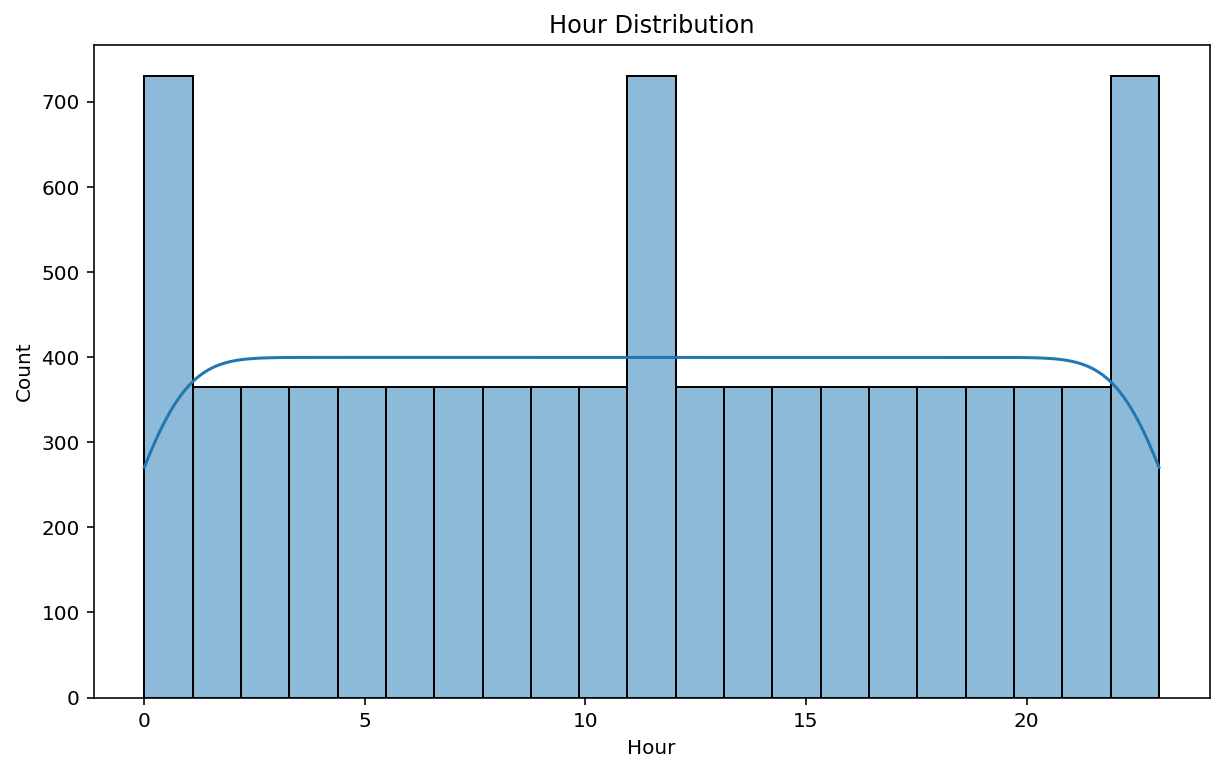

In [26]:
# Hour의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], kde=True) 
plt.title('Hour Distribution',fontsize=12)
plt.show()

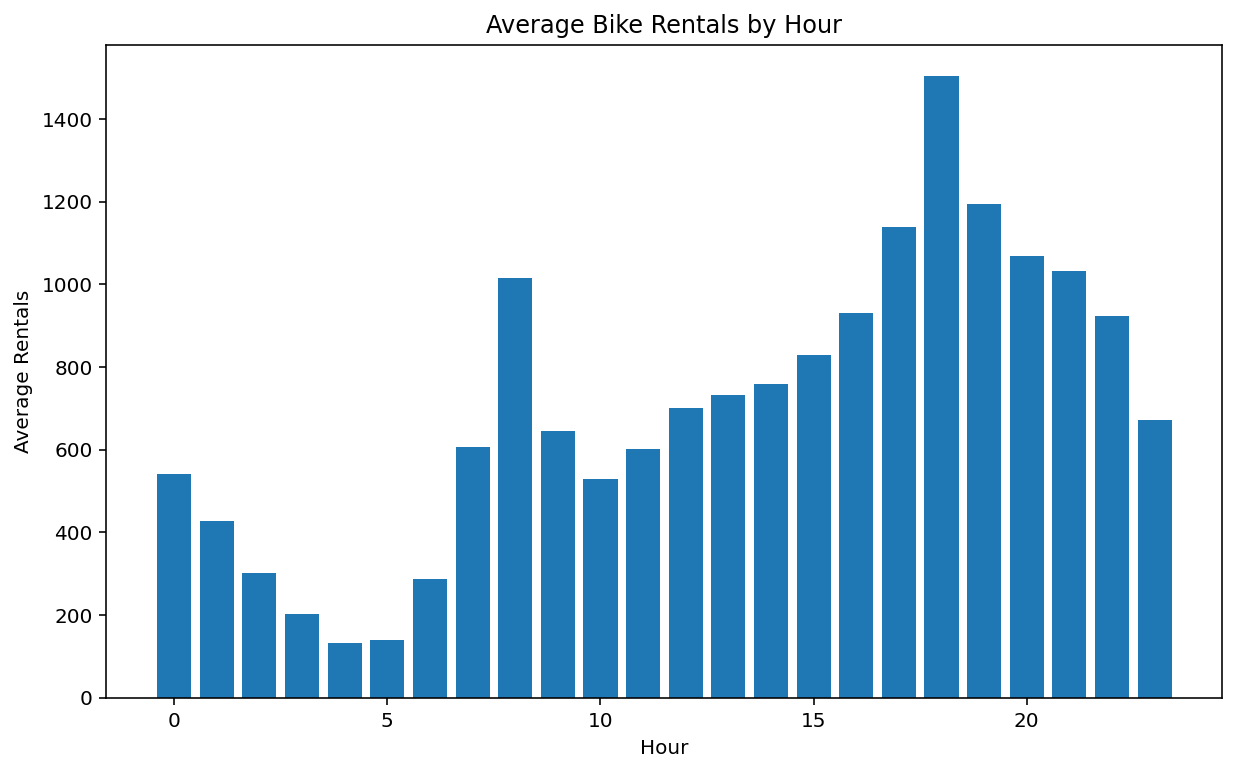

In [27]:
# 'Hour'별로 바이크 대여량의 평균 계산
hourly_rentals_mean = df.groupby('Hour')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hourly_rentals_mean.index, hourly_rentals_mean.values)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.show()

In [28]:
hourly_rentals_mean.tail(10)

Hour
14     758.824658
15     829.186301
22     922.797260
16     930.621918
8     1015.701370
21    1031.449315
20    1068.964384
17    1138.509589
19    1195.147945
18    1502.926027
Name: Rented Bike Count, dtype: float64

#### Temperature(°C)

기온

:날씨가 따뜻할수록 대여량이 증가한다
 
약 24~32도 사이에 대여량이 많다

In [29]:
df['Temperature'].describe()

count    7884.000000
mean       13.026370
std        11.936017
min       -17.800000
25%         3.600000
50%        13.950000
75%        22.600000
max        39.400000
Name: Temperature, dtype: float64

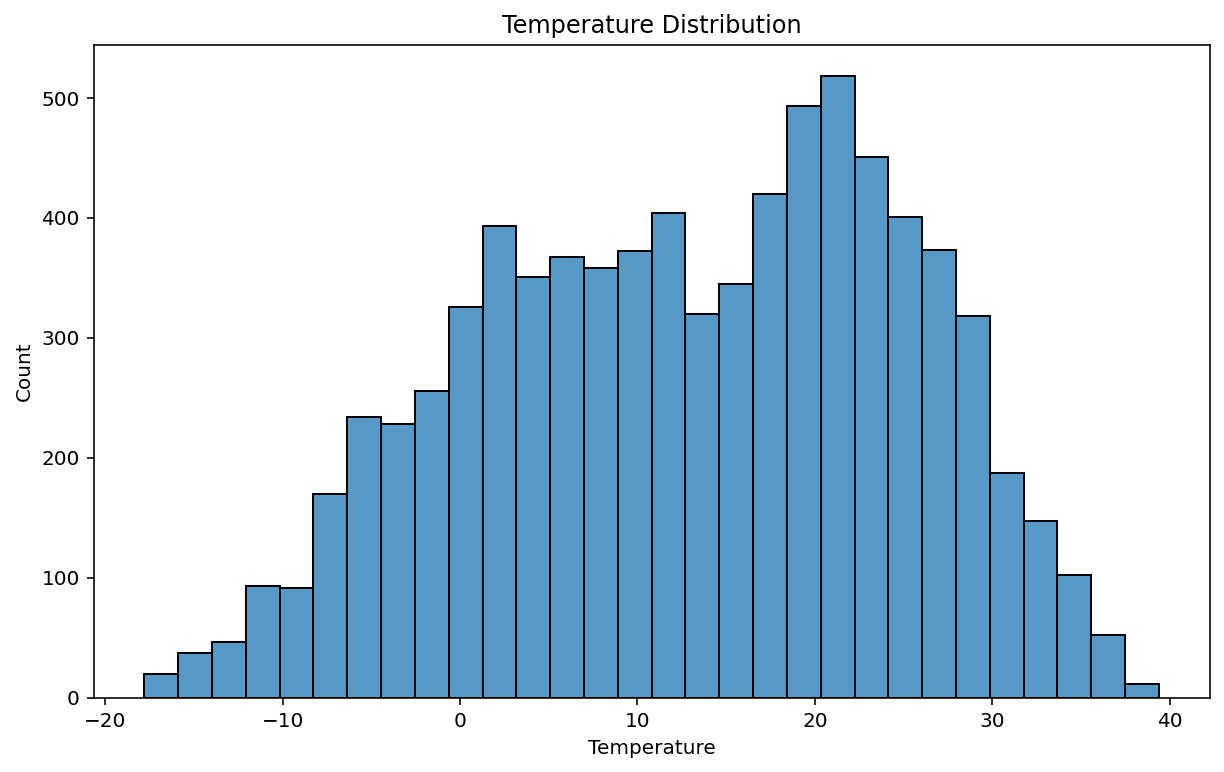

In [30]:
# Temperature의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'])
plt.title('Temperature Distribution',fontsize=12)
plt.show()

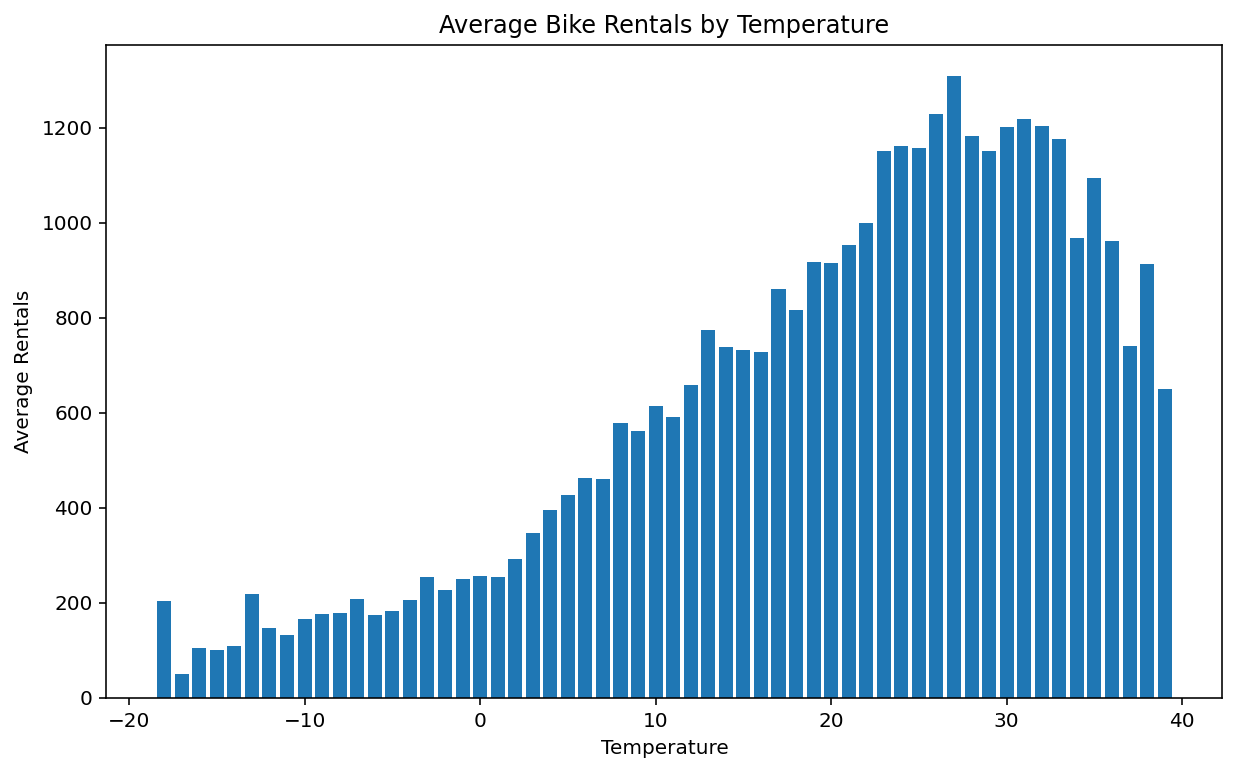

In [31]:
# 'Temperature'별로 바이크 대여량의 평균 계산
tem_rentals_mean = df.groupby(np.round(df['Temperature']))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(tem_rentals_mean.index, tem_rentals_mean.values)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals')
plt.show()

#### Humidity(%) / Dew point temperature((°C)

이슬점  : 대기 속 수증기가 포화되어 그 수중기의 일부가 물로 응결할 때의 온도를 뜻한다.

이슬점은 온도와 습도에 따라 변화 

    -> 이슬점이 높을 수록 자전거 대여량이 증가한다
    -> 이슬점은 기온이랑 거의 유사한 분포를 가진다

습도 :  습도로 뭘 알 수 있을까?

-> 습도 0% 불가능 이상치일 가능성 있음

In [32]:
df['Humidity'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity, dtype: float64

In [33]:
df['Dew point temperature'].describe()

count    8760.000000
mean        4.073813
std        13.060369
min       -30.600000
25%        -4.700000
50%         5.100000
75%        14.800000
max        27.200000
Name: Dew point temperature, dtype: float64

Text(0.5, 1.0, 'Dew Point Temperature Distribution')

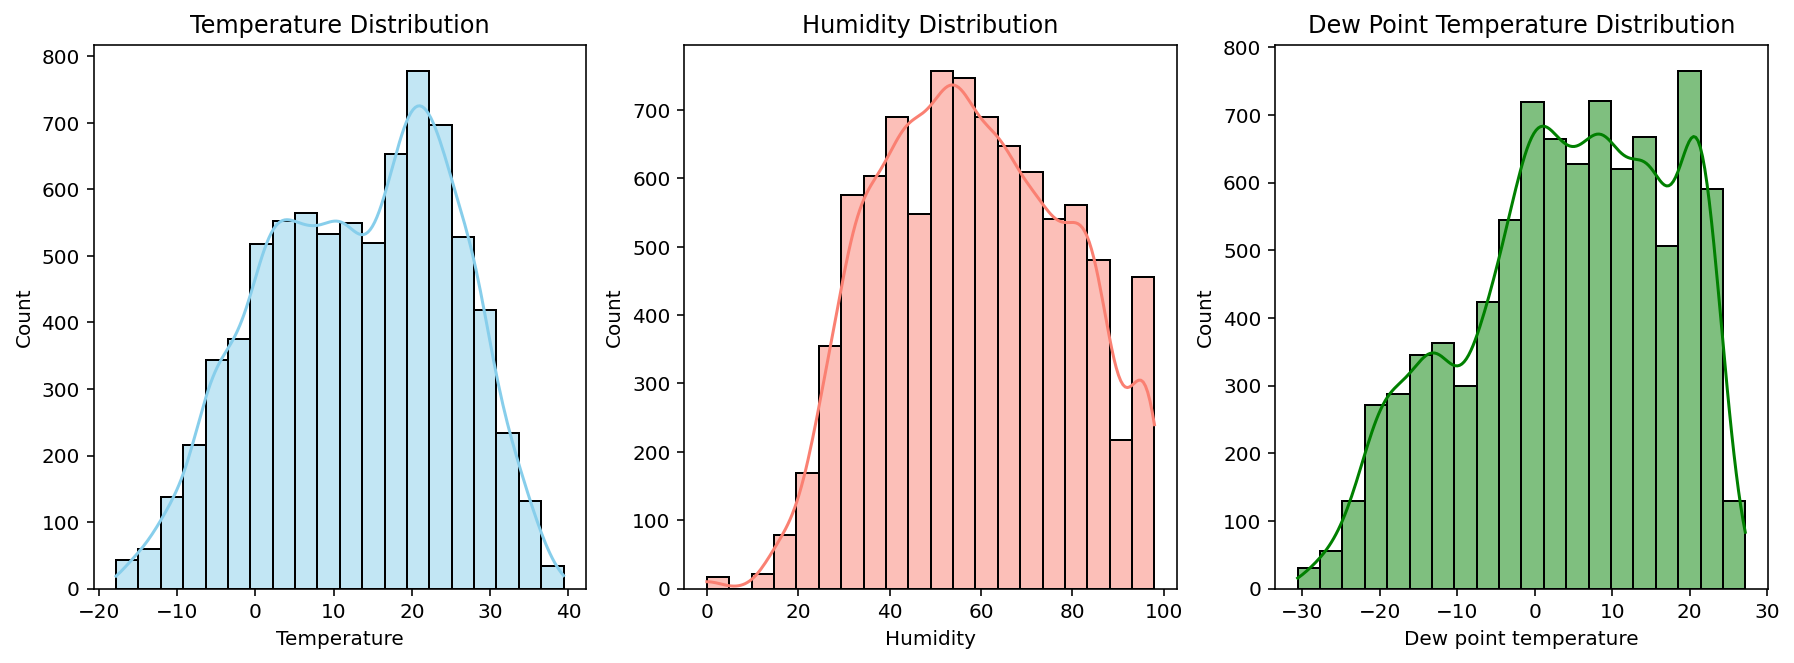

In [34]:
# 변수들의 분포 분석
plt.figure(figsize=(15, 5))

# Temperature의 분포
plt.subplot(1, 3, 1)
sns.histplot(df['Temperature'], bins=20, color='skyblue', kde=True)
plt.title('Temperature Distribution')

# Humidity의 분포
plt.subplot(1, 3, 2)
sns.histplot(df['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

# Dew point temperature의 분포
plt.subplot(1, 3, 3)
sns.histplot(df['Dew point temperature'], bins=20, color='green', kde=True)
plt.title('Dew Point Temperature Distribution')

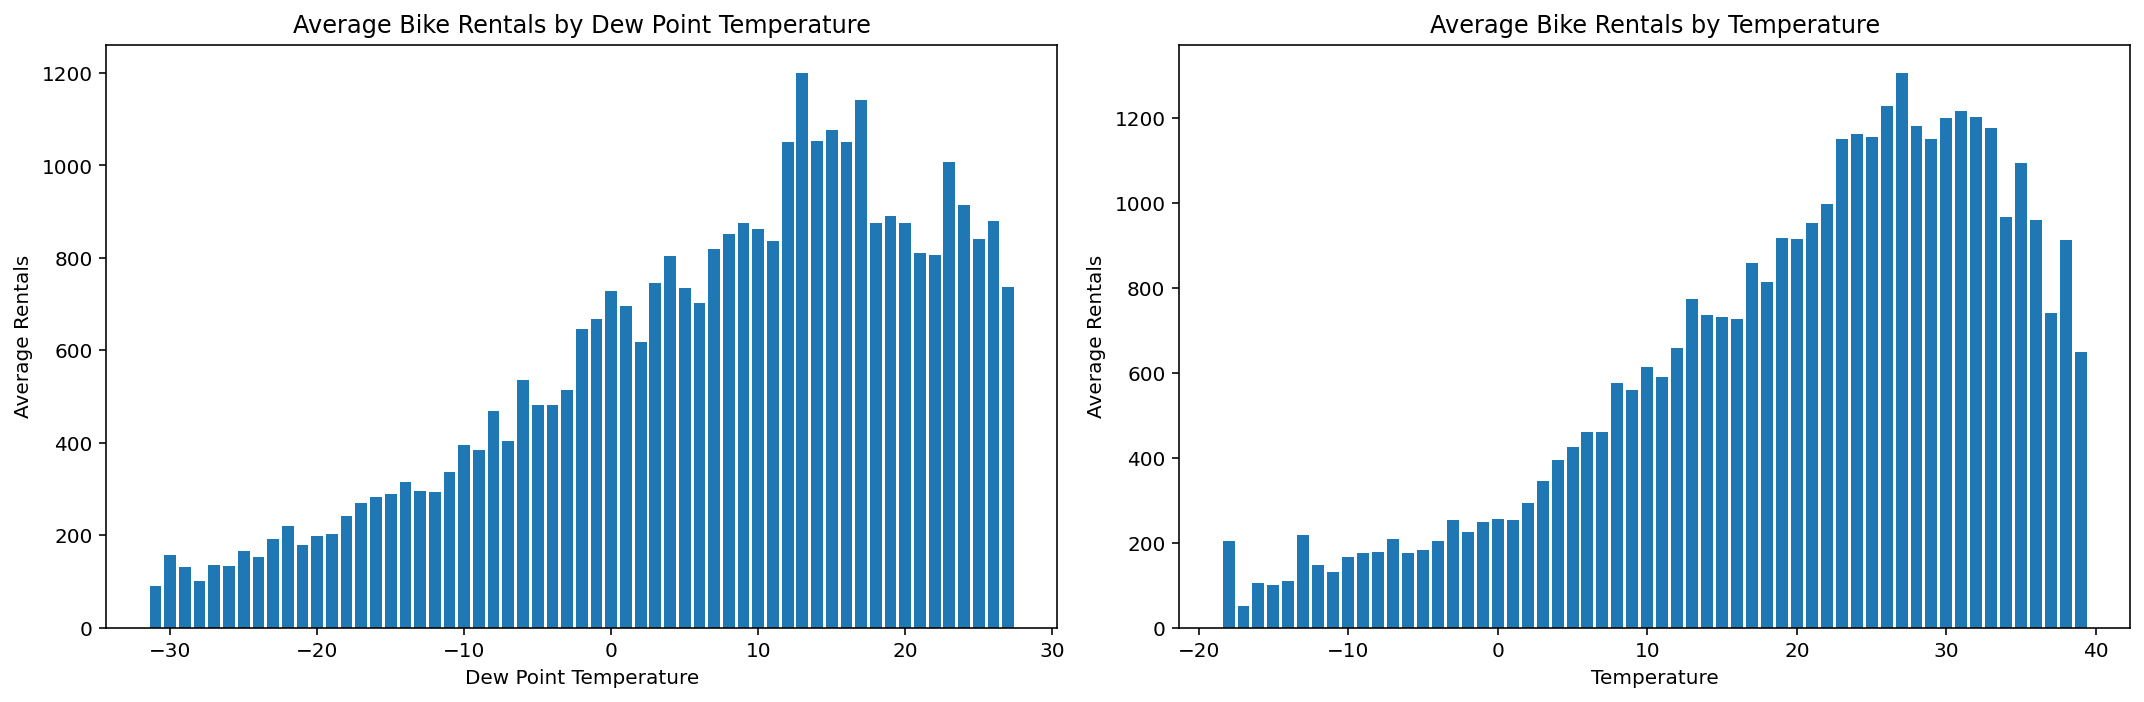

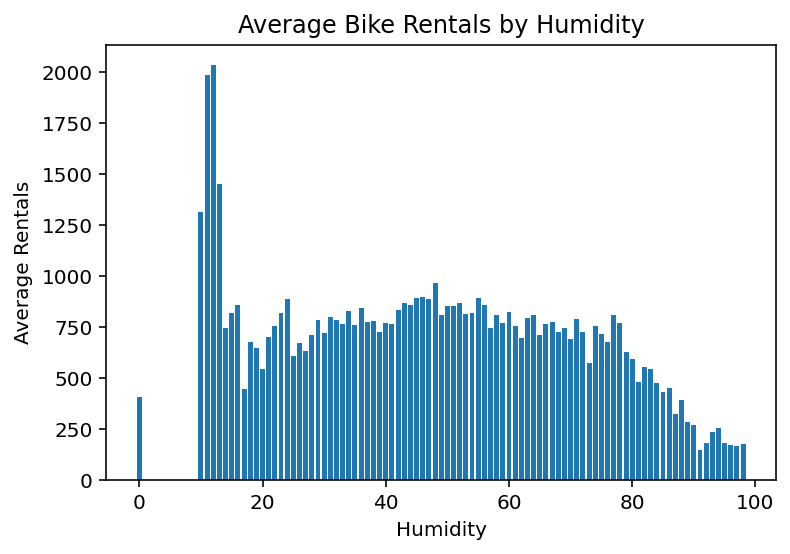

In [35]:
# 이슬점 별 자전거 대여량의 평균 계산
df['Rounded Dewpoint'] = np.round(df['Dew point temperature'])
dewpoint_rentals_mean = df.groupby('Rounded Dewpoint')['Rented Bike Count'].mean()

plt.figure(figsize=(15, 5))

# 이슬점 별 자전거 대여량 그래프 그리기
plt.subplot(1, 2, 1)
plt.bar(dewpoint_rentals_mean.index, dewpoint_rentals_mean.values)
plt.title('Average Bike Rentals by Dew Point Temperature')
plt.xlabel('Dew Point Temperature')
plt.ylabel('Average Rentals')
plt.tight_layout()


# 온도 별 자전거 대여량 그래프 그리기
plt.subplot(1, 2, 2)
plt.bar(tem_rentals_mean.index, tem_rentals_mean.values)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals')

plt.tight_layout()  # 그래프 간의 간격 조정
plt.show()

# 'Humidity'별로 바이크 대여량의 평균 계산

hum_rentals_mean = df.groupby('Humidity')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(hum_rentals_mean.index, hum_rentals_mean.values)
plt.title('Average Bike Rentals by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Average Rentals')
plt.show()

#### Wind speed(m/s)

풍량

    -> 다른 변수에 비해 큰 대여량 차이는 없다

In [36]:
df['Wind speed'].describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed, dtype: float64

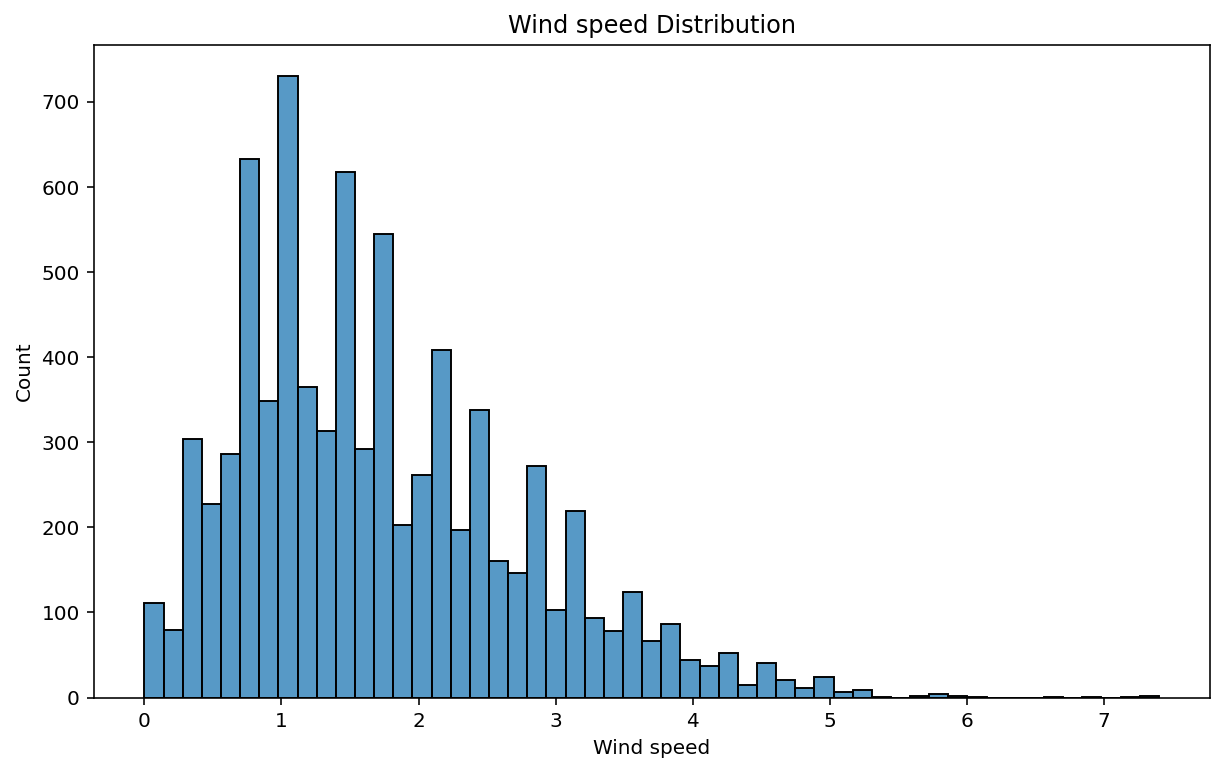

In [37]:
# Wind speed의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind speed'])
plt.title('Wind speed Distribution',fontsize=12)
plt.show()

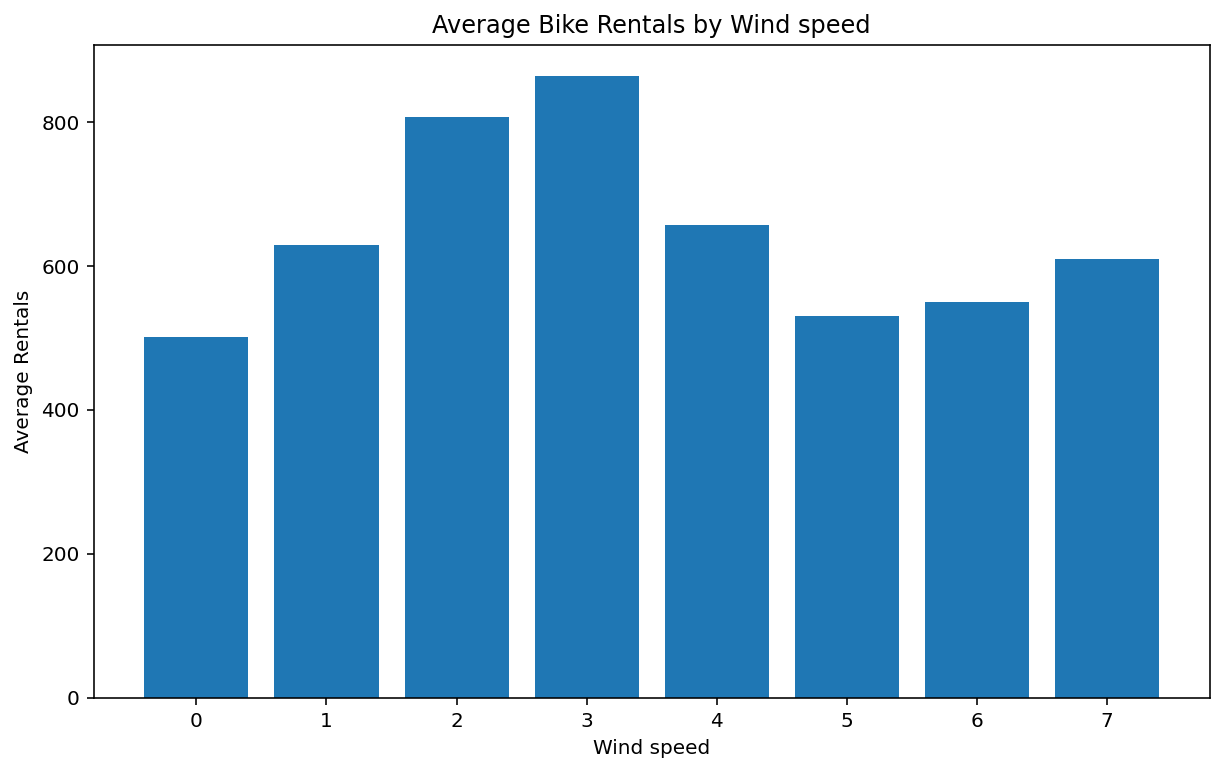

In [38]:
# 'Wind speed'별로 바이크 대여량의 평균 계산
wind_rentals_mean = df.groupby(np.round(df['Wind speed']))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(wind_rentals_mean.index, wind_rentals_mean.values)
plt.title('Average Bike Rentals by Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Average Rentals')
plt.show()

#### Visibility (10m)

가시성 : 대기 중의 물체가 얼마나 멀리 볼 수 있는지를 나타내는 지표입니다. 주로 대기 중의 먼지, 연기, 안개 등으로 인해 물체가 가리여 보이는 정도를 측정하는 데 사용됩니다. 

가시거리가 높을 수록 대여량이 증가한다.

In [39]:
df['Visibility'].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility, dtype: float64

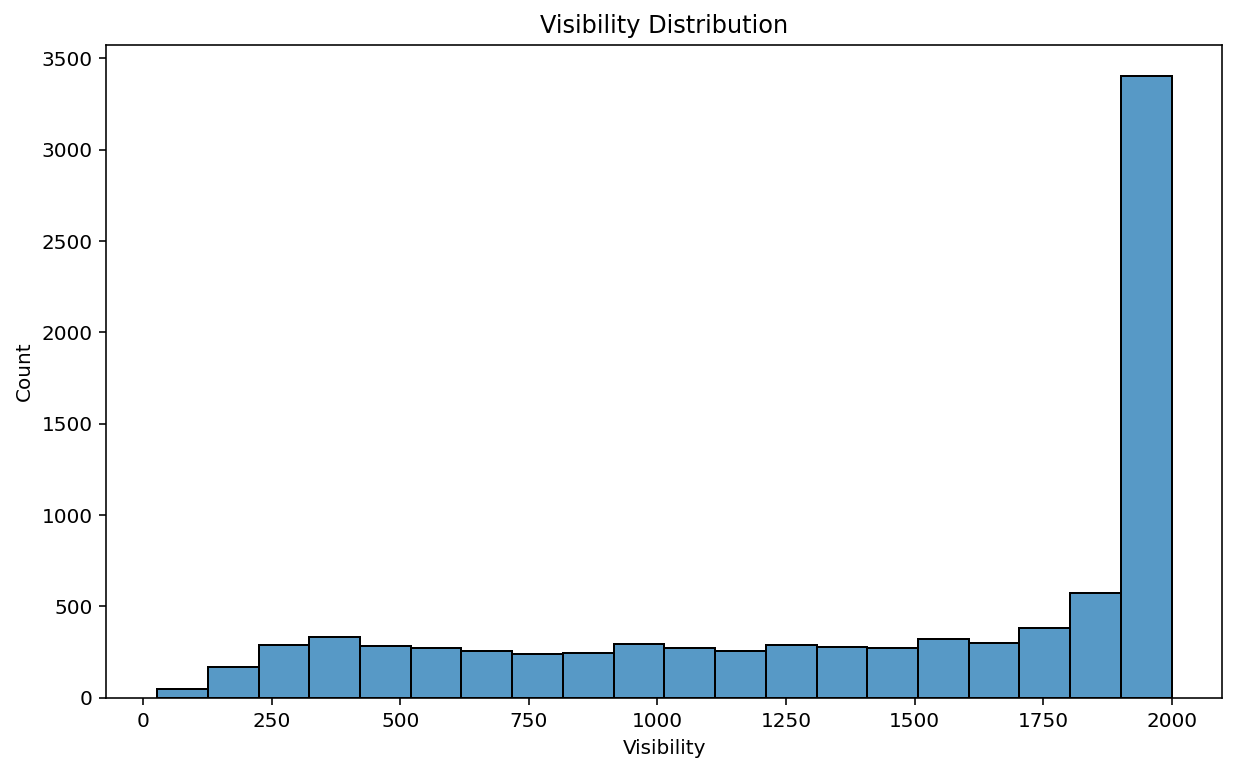

In [40]:
# Visibility의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Visibility'])
plt.title('Visibility Distribution',fontsize=12)
plt.show()

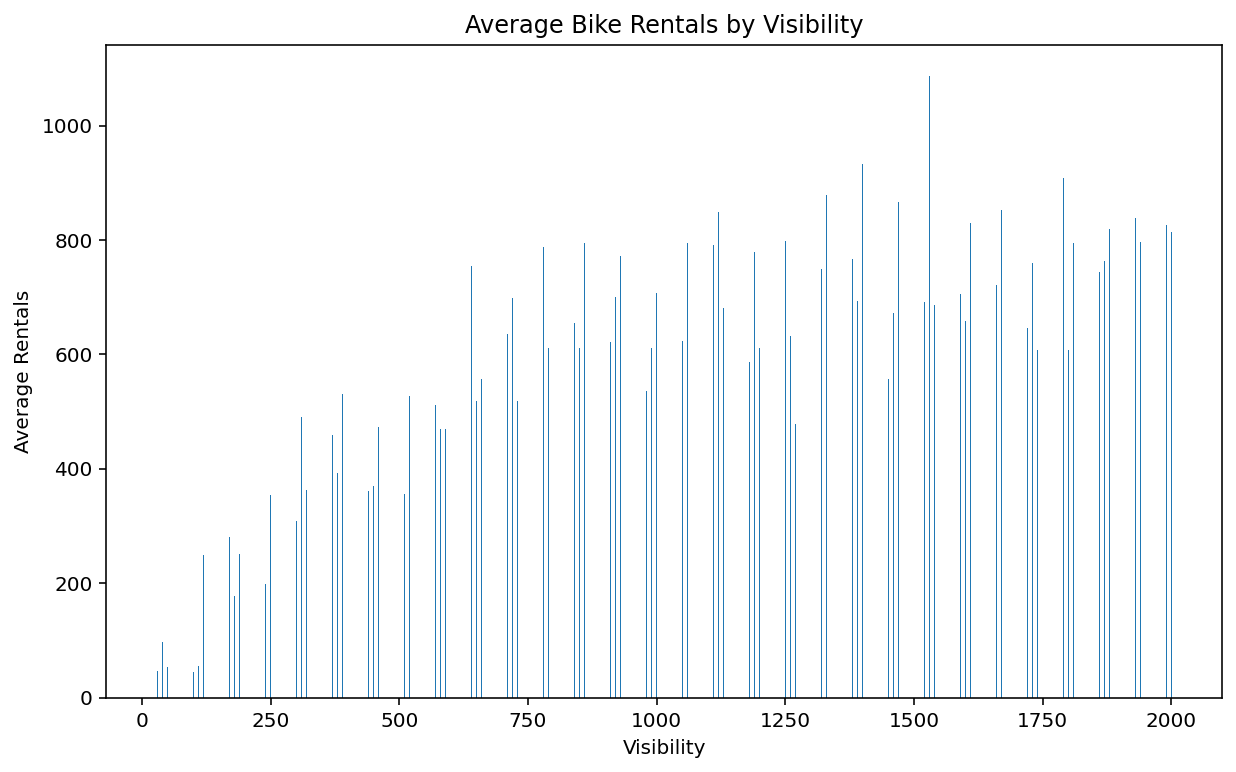

In [41]:
# 'Visibility'별로 바이크 대여량의 평균 계산 -> 다른 방법은 없나..?
vis_rentals_mean = df.groupby(np.round(df['Visibility'],-1))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(vis_rentals_mean.index, vis_rentals_mean.values)
plt.title('Average Bike Rentals by Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Rentals')
plt.show()

#### Solar Radiation(MJ/m2)

태양복사 : 태양 복사량은 낮과 밤, 계절에 따라 변동하며, 지구의 위치와 대기 상태에 따라 다양한 영향을 줍니다.

    -> 태양이 지표면으로 많이 들어올수록 대여량 증가
    -> 낮 그리고 흐리지 않은 날일 수록 대여량 증가

In [42]:
df['Solar Radiation'].describe()

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation, dtype: float64

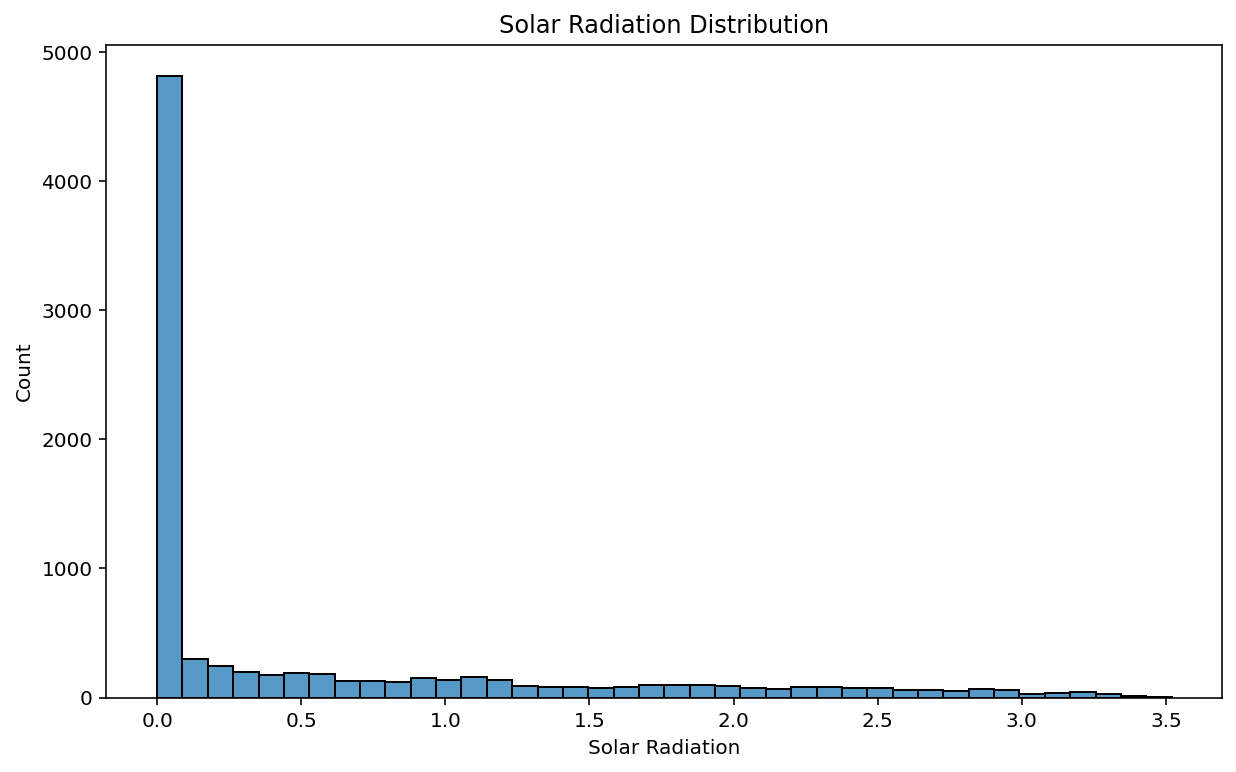

In [43]:
# Solar Radiation의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Solar Radiation'])
plt.title('Solar Radiation Distribution',fontsize=12)
plt.show()

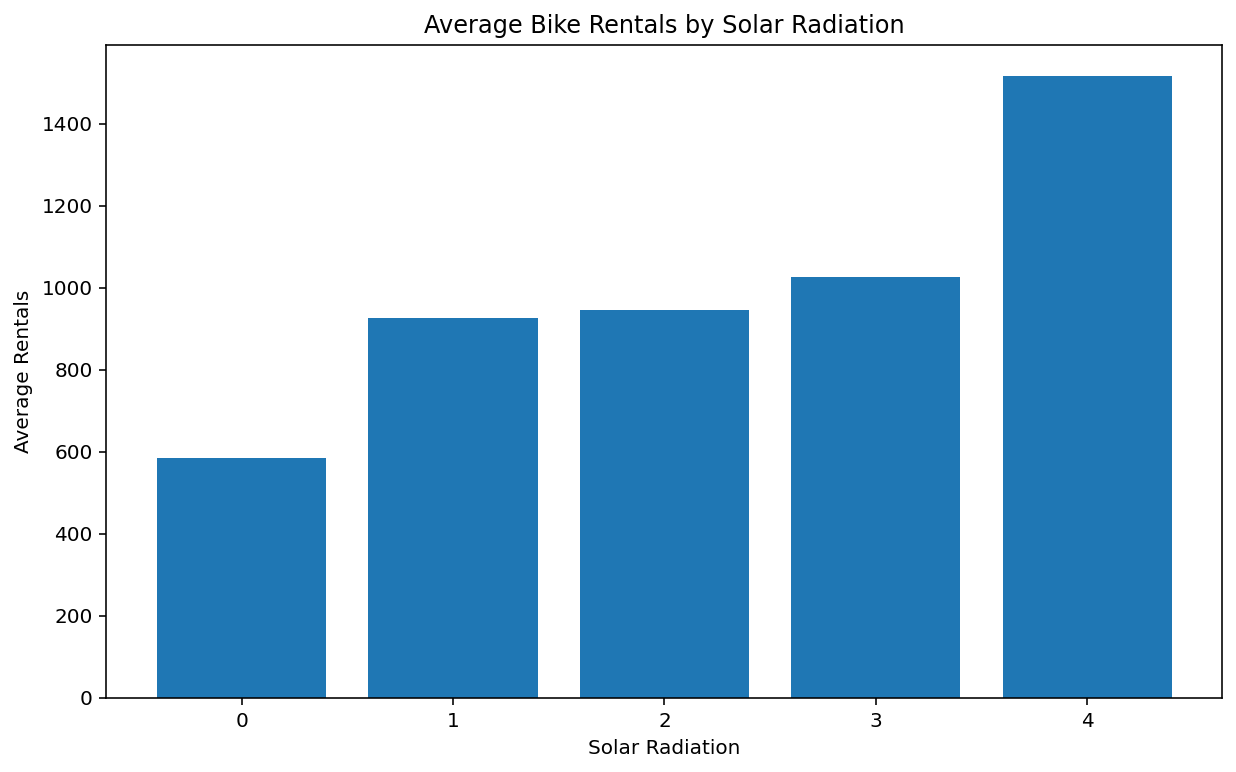

In [44]:
# 'Solar Radiation'별로 바이크 대여량의 평균 계산 

vis_rentals_mean = df.groupby(np.round(df['Solar Radiation']))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(vis_rentals_mean.index, vis_rentals_mean.values)
plt.title('Average Bike Rentals by Solar Radiation')
plt.xlabel('Solar Radiation')
plt.ylabel('Average Rentals')
plt.show()

#### Rainfall(mm)/ Snowfall(cm)

강우량/적설량
:비랑 눈이 많이 오면 자건거 대여량이 줄어든다

-> 비랑 눈의 여부로 변수를 하나더 만들어도 좋을 것 같다

In [45]:
print(df['Rainfall'].describe())
print(df['Snowfall'].describe())

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall, dtype: float64
count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall, dtype: float64


Text(0.5, 1.0, 'Snowfall Distribution')

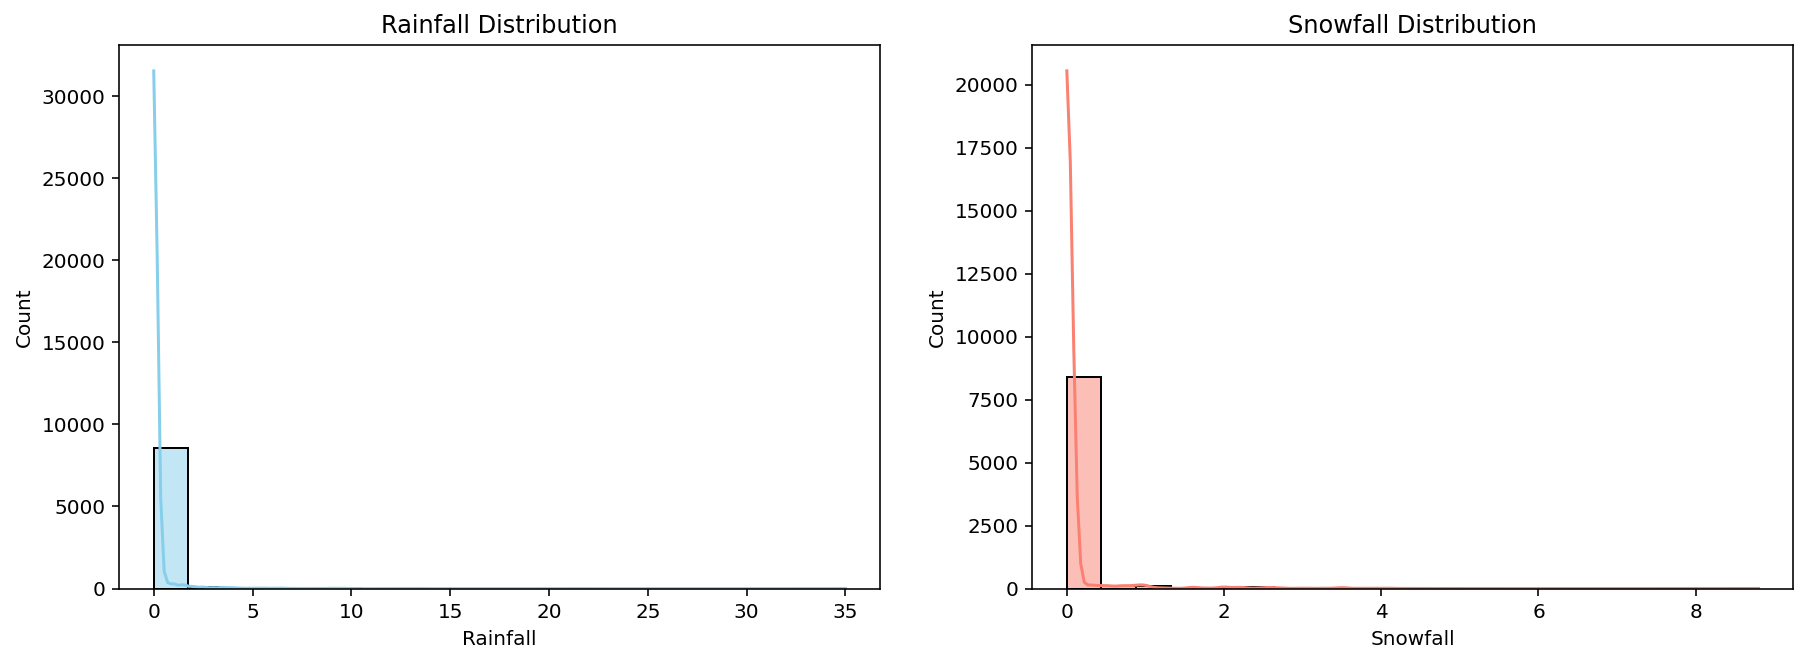

In [46]:
# 변수들의 분포 분석
plt.figure(figsize=(15, 5))

# Temperature의 분포
plt.subplot(1, 2, 1)
sns.histplot(df['Rainfall'], bins=20, color='skyblue', kde=True)
plt.title('Rainfall Distribution')

# Humidity의 분포
plt.subplot(1, 2, 2)
sns.histplot(df['Snowfall'], bins=20, color='salmon', kde=True)
plt.title('Snowfall Distribution')


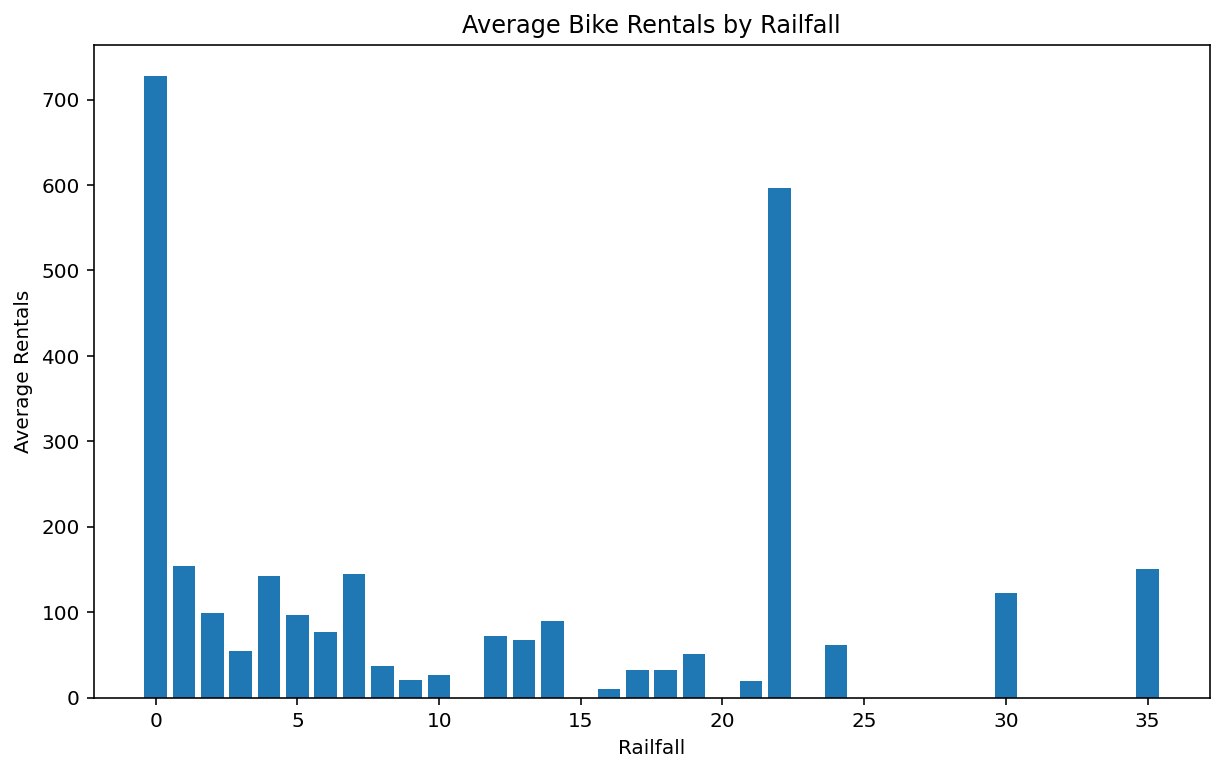

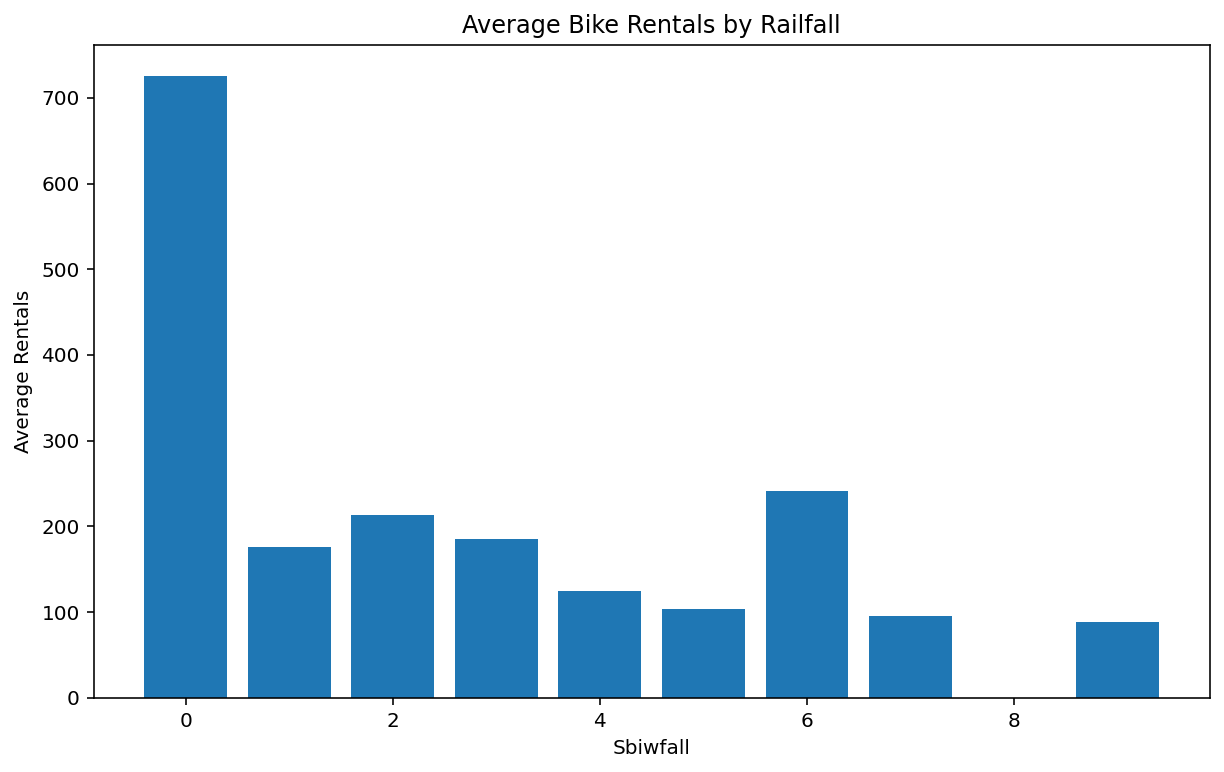

In [47]:
# 'Rainfall'별로 바이크 대여량의 평균 계산 

rain_rentals_mean = df.groupby(np.round(df['Rainfall']))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(rain_rentals_mean.index, rain_rentals_mean.values)
plt.title('Average Bike Rentals by Railfall')
plt.xlabel('Railfall')
plt.ylabel('Average Rentals')
plt.show()

# 'Snowfall'별로 바이크 대여량의 평균 계산 

snow_rentals_mean = df.groupby(np.round(df['Snowfall']))['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(snow_rentals_mean.index, snow_rentals_mean.values)
plt.title('Average Bike Rentals by Railfall')
plt.xlabel('Sbiwfall')
plt.ylabel('Average Rentals')
plt.show()

### 날짜형 변수

#### Date

datetime으로 변수타입 변환

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            7884 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             7884 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                7884 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

### 1차 전처리

    * 파생변수 생성
    * 결측치 처리
    * 이상치 처리
    * 변수 변환

#### 파생변수 생성

강우/적설 유무 
강수 유무 : 대기 중에서 떨어지는 모든 형태의 수증기

    강우 > 1 =  강우 유무 yes
    적설 > 0 =  적설 유무 yes
    강우 + 적설 > 1 -> 강수 유무 yes 


In [49]:
# 강우 유무 변수 생성
df['Rainfall_yes'] = df['Rainfall'] > 1  # 강우량이 1 이상인 경우에는 강우 유무를 yes로 설정

# 적설 유무 변수 생성
df['Snowfall_yes'] = df['Snowfall'] > 0  # 적설량이 0보다 큰 경우에는 적설 유무를 yes로 설정

In [50]:
df['Snow Rain'] = df['Rainfall_yes'] | df['Snowfall_yes']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            7884 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             7884 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                7884 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


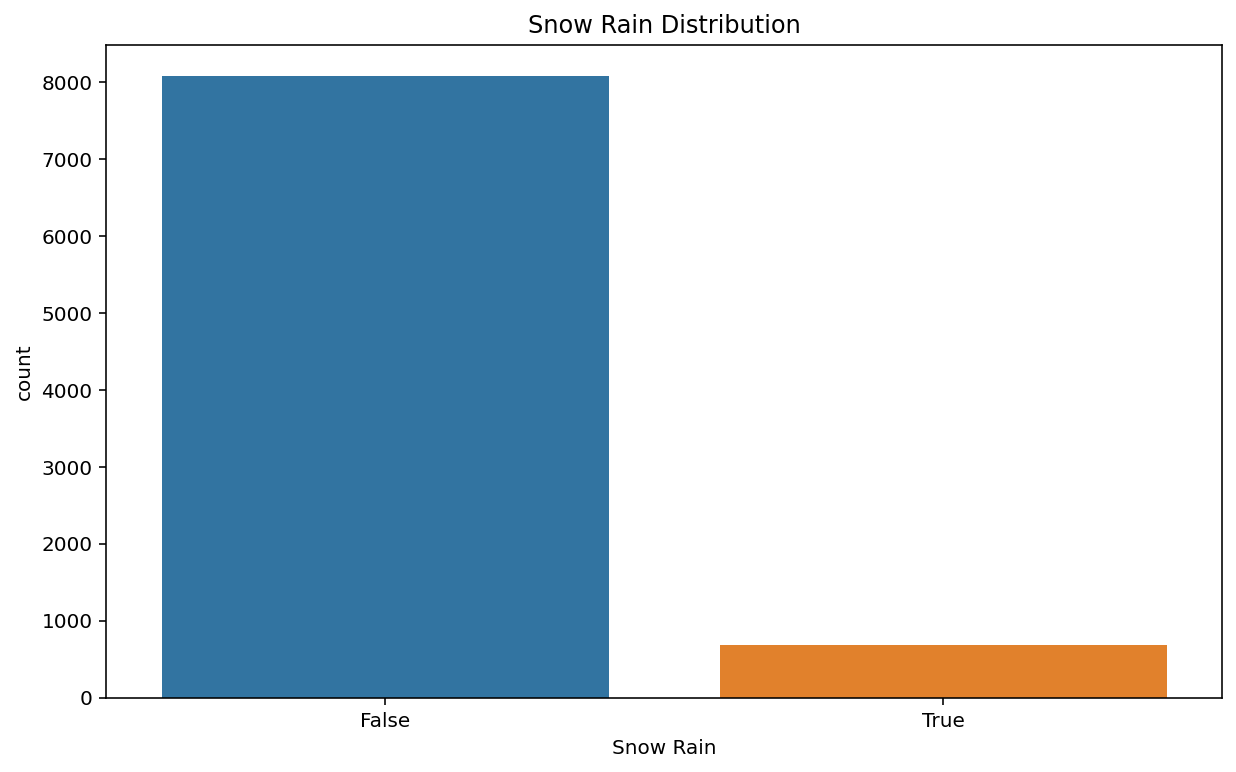

In [52]:
# Snow Rain의 분포
plt.figure(figsize=(10, 6))
sns.countplot(df['Snow Rain'])
plt.title('Snow Rain Distribution',fontsize=12)
plt.show()

Snow Rain
False    750.847011
True     155.977974
Name: Rented Bike Count, dtype: float64


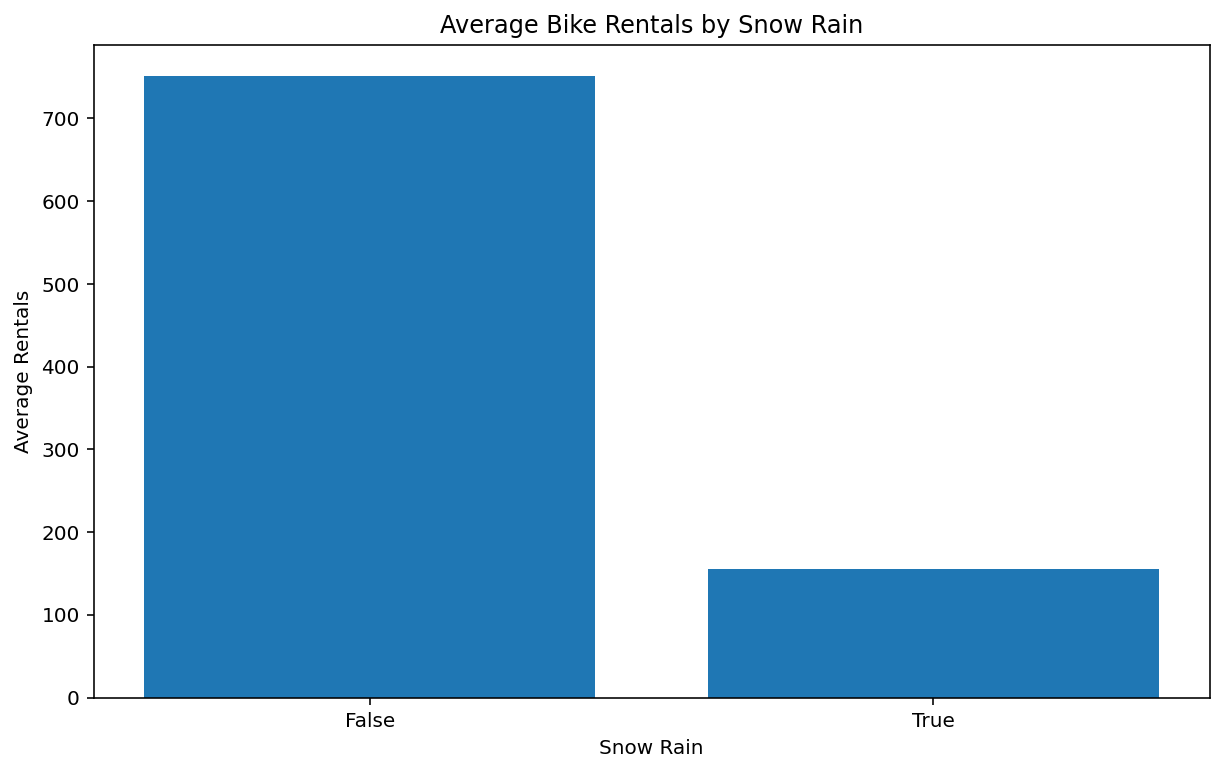

In [53]:
# 'Snow Rain'별로 바이크 대여량의 평균 계산 

snrn_rentals_mean = df.groupby(df['Snow Rain'])['Rented Bike Count'].mean()
print(snrn_rentals_mean)
# 그래프 그리기 ( 다시 그리기)
plt.figure(figsize=(10, 6))
plt.bar(snrn_rentals_mean.index.astype(str), snrn_rentals_mean.values)
plt.title('Average Bike Rentals by Snow Rain')
plt.xlabel('Snow Rain')
plt.ylabel('Average Rentals')
plt.show()


In [54]:
df = df.drop('Rainfall_yes',axis = 1)
df = df.drop('Snowfall_yes',axis = 1)


In [55]:
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rounded Dewpoint,Snow Rain
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,-18.0,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-18.0,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,-18.0,False
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-18.0,False
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-19.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes,-10.0,False
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,-10.0,False
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,-10.0,False
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,-10.0,False


### 결측치 처리

In [56]:
df_v1 = df.copy() #원본 데이터 보존을 위해 얕은 복사 실행

#### Temperature 결측값

In [57]:
df._get_numeric_data().corr().Temperature.sort_values()

Snow Rain               -0.240550
Snowfall                -0.221321
Wind speed              -0.034464
Visibility               0.039581
Rainfall                 0.050215
Hour                     0.116151
Humidity                 0.156094
Solar Radiation          0.356539
Rented Bike Count        0.537229
Rounded Dewpoint         0.911735
Dew point temperature    0.912099
Temperature              1.000000
Name: Temperature, dtype: float64

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
print(f'대체 전: {df.Temperature.isna().sum()}')

대체 전: 876


In [60]:
#Temperature 와 Dew point temperature는 강한 양의 상관관계를 가지고 있다
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Rented Bike Count', 'Dew point temperature', 'Temperature']])
df_v1.Temperature=pd.DataFrame(imputed_arr, columns=['Rented Bike Count', 'Dew point temperature', 'Temperature']).Temperature.round()

In [61]:
print(f'대체 후: {df_v1.Temperature.isna().sum()}')

대체 후: 0


#### Seasons 결측값

날짜에 맞춰서 계절 결측값 대체

In [62]:
df['Month'] = df['Date'].dt.month

# 결과 출력
print(df[['Month', 'Seasons']]) 

      Month Seasons
0        12     NaN
1        12  Winter
2        12  Winter
3        12  Winter
4        12  Winter
...     ...     ...
8755     11     NaN
8756     11  Autumn
8757     11  Autumn
8758     11  Autumn
8759     11  Autumn

[8760 rows x 2 columns]


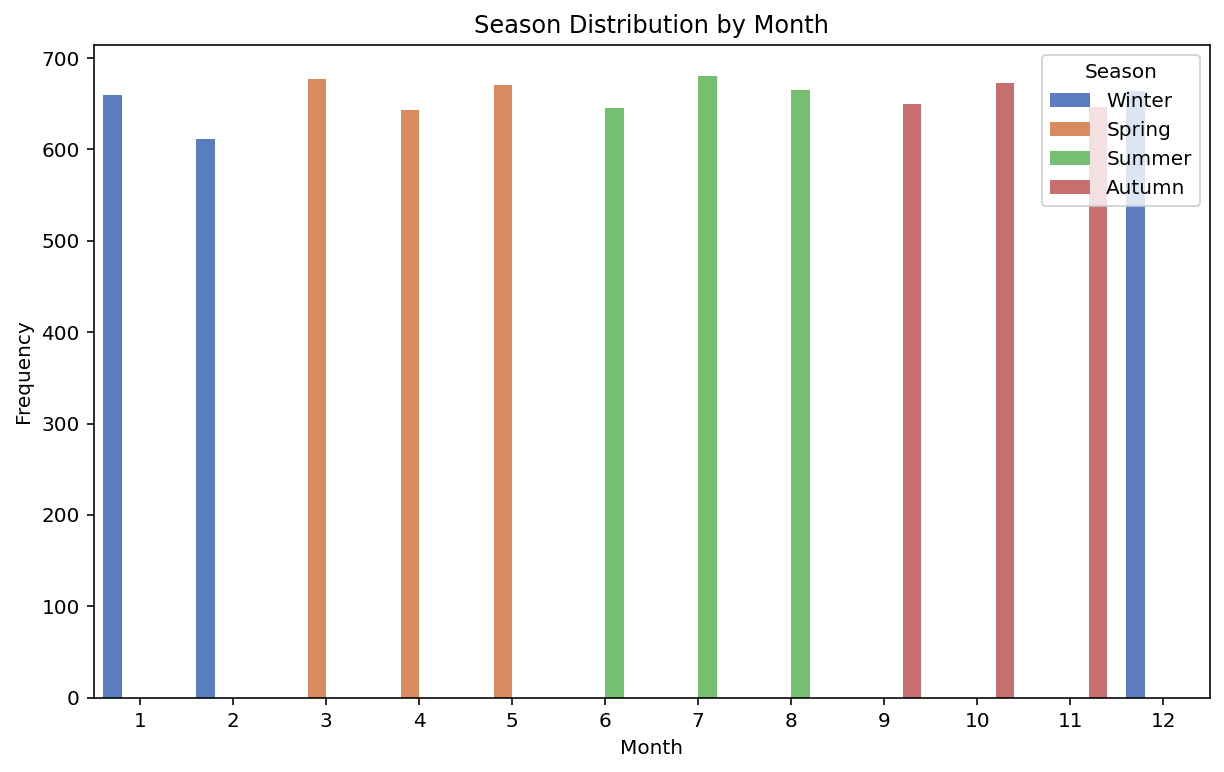

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Seasons', data=df, palette='muted')

plt.title('Season Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Season')

#이 그래프를 봤을 때 3,4,5 월 spring 6,7,8 월 summer 9,10,11 월 Autumn, 12,1,2 월 Winter
#뭔가 더 잘 알아낼 방법이 있을 거 같음

In [64]:
print(f'대체 전: {df.Seasons.isna().sum()}')

대체 전: 876


In [65]:
# Seasons 열의 결측값 처리
def fill_missing_season(row):
    month = row['Month']
    if pd.isna(row['Seasons']):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    else:
        return row['Seasons']

df_v1['Seasons'] = df.apply(fill_missing_season, axis=1)

In [66]:
print(f'대체 후: {df_v1.Seasons.isna().sum()}')

대체 후: 0


#### Wind speed 결측값

계절별 Wind speed 평균값으로 대체

In [67]:
df._get_numeric_data().corr()['Wind speed'].sort_values()
# Wind speed와 상관관계가 있는 변수가 없다
# 일단 평균값으로 대체 근데 Why?
# 계절별 평균값으로 넣는게 더 좋을라나??/

Humidity                -0.336105
Rounded Dewpoint        -0.178202
Dew point temperature   -0.178011
Month                   -0.159328
Temperature             -0.034464
Rainfall                -0.019080
Snowfall                -0.001319
Snow Rain                0.023441
Rented Bike Count        0.116558
Visibility               0.170671
Hour                     0.284573
Solar Radiation          0.331239
Wind speed               1.000000
Name: Wind speed, dtype: float64

In [68]:
df['Wind speed'].describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed, dtype: float64

In [69]:
wind_mean = df.groupby('Seasons')['Wind speed'].mean().sort_values()
wind_mean

Seasons
Autumn    1.497106
Summer    1.631778
Spring    1.852860
Winter    1.918714
Name: Wind speed, dtype: float64

In [70]:
print(f'대체 전: {df["Wind speed"].isna().sum()}')

대체 전: 876


In [71]:
df_v1['Wind speed']=df_v1['Wind speed'].fillna(df_v1['Seasons'].map(wind_mean))

In [72]:
print(f'대체 후: {df_v1["Wind speed"].isna().sum()}')

대체 후: 0


In [73]:
df_v1.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Rounded Dewpoint         0
Snow Rain                0
dtype: int64

### 이상치 처리

Humidity 0% 실제로 나올 수 없는 값

#### Humidity 이상치

계절별 humidity 평균값으로 대체

Text(0.5, 1.0, 'Humidity Distribution')

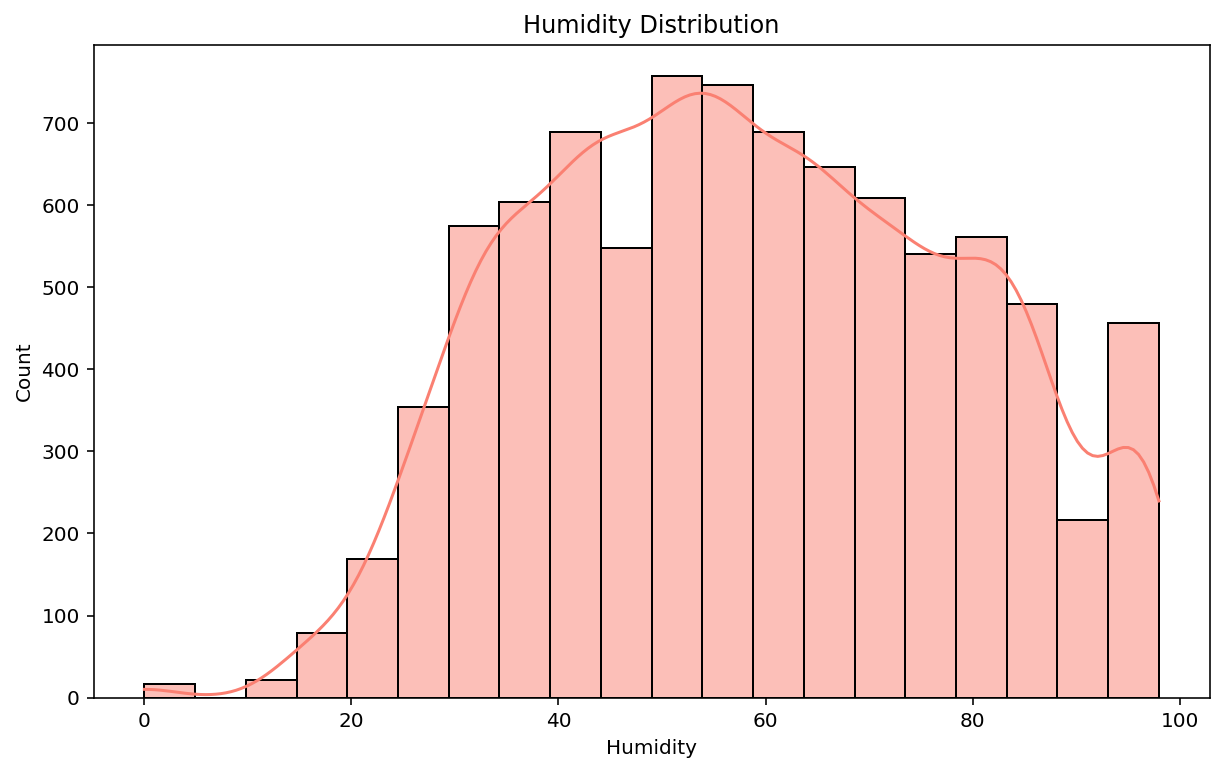

In [74]:
# Humidity의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

In [75]:
(df['Humidity'] == 0).sum()

17

In [76]:
hum_mean = df_v1.groupby('Seasons')['Humidity'].mean().sort_values()
hum_mean

Seasons
Winter    49.744907
Spring    58.776721
Autumn    59.228480
Summer    64.981431
Name: Humidity, dtype: float64

In [77]:
# Humidity가 0인 값을 해당 계절의 평균 Humidity 값으로 대체
for season, mean_humidity in hum_mean.items():
    df_v1.loc[(df['Humidity'] == 0) & (df_v1['Seasons'] == season), 'Humidity'] = mean_humidity

In [78]:
(df_v1['Humidity'] == 0).sum()

0

Text(0.5, 1.0, 'Humidity Distribution')

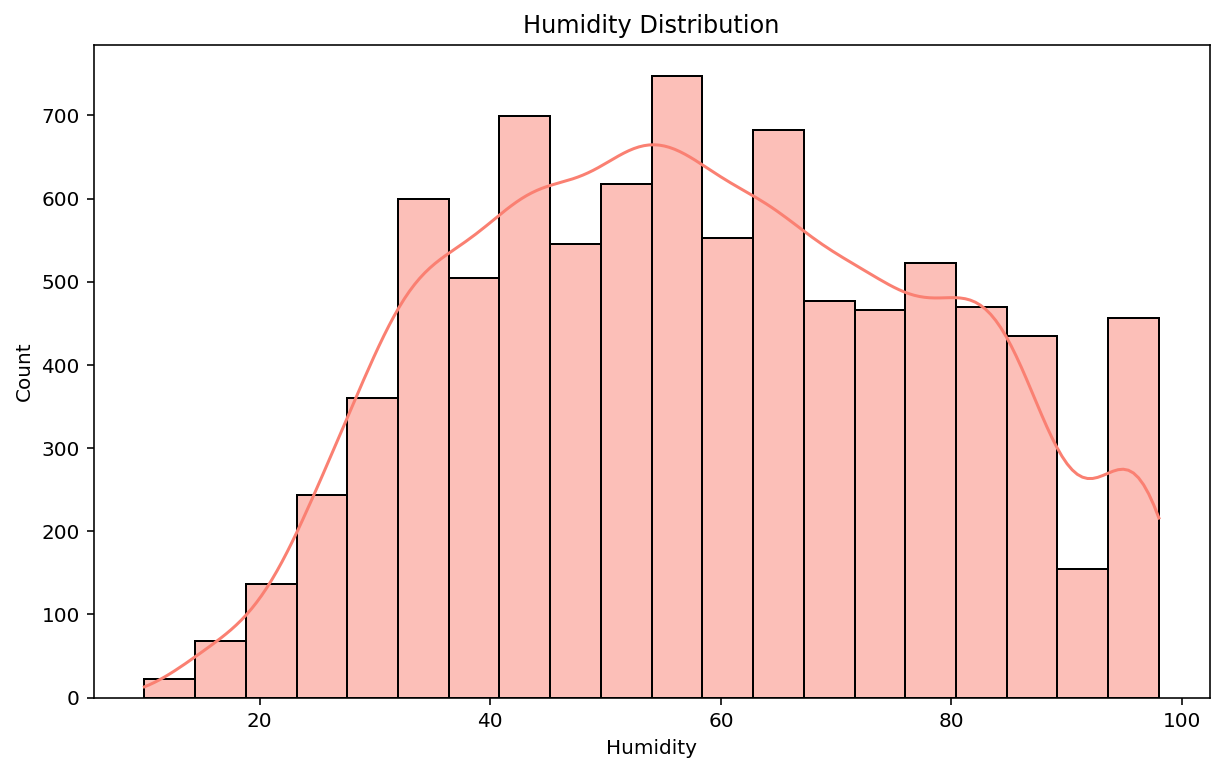

In [79]:
# Humidity의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df_v1['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

### 파일 저장하기

In [80]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   float64       
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [81]:
#df_v1을 csv파일로 저장
df_v1.to_csv("SeoulBikeData_clean.csv", index = False)

## 2차 전처리

Random Forest에 맞춰서

### 범주형 데이터 수치화

명목형 변수 : Seasons / Holiday / Functioning day/ Snow Rain

#### One-Hot Encoding


In [82]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(df_v1[["Seasons","Holiday","Functioning Day","Snow Rain"]])
result_ohe

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [83]:
#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Seasons","Holiday","Functioning Day","Snow Rain"]))
df_ohe

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Snow Rain_False,Snow Rain_True
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8756,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8757,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8758,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [84]:
df_v1 = pd.concat([df_v1, df_ohe], axis=1)

In [85]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   float64       
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun